# Plot Kinematical distribution of tagged and untagged events 
$x_B, Q^2, W, z_{\pi}...$

If possible, apply background subtraction of tagged events, based on ToF

last edit Aug-3, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
selected runs of $(e,e'\pi)$ data

In [3]:
load_SIDIS_data( Nruns = 2, do_e_e_pi=True, fdebug=1, do_all_vars=True)

Done loading files.

Total statistics:
770463  (e,e'π+) events
112  (e,e'π+n) events
345130  (e,e'π-) events
50  (e,e'π-n) events


and all runs of $(e,e'\pi n)$

In [4]:
load_SIDIS_data( Nruns = -1, do_e_e_pi=False, fdebug=1)

Done loading files.

Total statistics:
3933  (e,e'π+n) events
1279  (e,e'π-n) events


# (2) Apply selection cuts not previously imposed
without the cut on $p_n > 0.275$ GeV/c

In [6]:
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=True, 
                                                                             fdebug=2, 
                                                                             NeventsMax=-1);

Applying selection cuts not previously imposed
(1) DATA
(e,e'π)
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 770463 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-499999
Applying p-theta on cut for piminus on 345130 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-345129
Apply a cut on the missing mass of a (e,e'π) reaction: 2.5<Mx<5.0 GeV/c2
(e,e π+ )
770463 events after original cut (100.0 %)
406121 events after p-theta cut (52.7 %)
358117 events after Mx cut (46.5 %)
358117 events after Kinematical cut (46.5 %)
(e,e π- )
345130 events after original cut (100.0 %)
344607 events after p-theta cut (99.8 %)
310577 events after Mx cut (90.0 %)
310576 events after Kinematical cut (90.0 %)
 
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 2778 events
Subdividing int

## (2.1) Count event statistics

In [7]:
Stats = dict()
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    Stats["$(e,e'"+pi_label+")$"]  = float(len(e_e_pi_pass_cuts[pi_ch]))
    Stats["$(e,e'"+pi_label+"n)$"] = float(len(e_e_pi_n_pass_cuts[pi_ch]))

Stats["$(e,e'\\pi^{+})/(e,e'\\pi^{-})$"] = Stats["$(e,e'\\pi^{+})$"]/Stats["$(e,e'\\pi^{-})$"]
Stats["$(e,e'\\pi^{+}n)/(e,e'\\pi^{-}n)$"] = Stats["$(e,e'\\pi^{+}n)$"]/Stats["$(e,e'\\pi^{-}n)$"]
print(Stats)    

{"$(e,e'\\pi^{+})$": 358117.0, "$(e,e'\\pi^{+}n)$": 2777.0, "$(e,e'\\pi^{-})$": 310576.0, "$(e,e'\\pi^{-}n)$": 861.0, "$(e,e'\\pi^{+})/(e,e'\\pi^{-})$": 1.1530736438102107, "$(e,e'\\pi^{+}n)/(e,e'\\pi^{-}n)$": 3.2253193960511033}


# (3) Plot kinematical distributions
$ x_B = Q^2/2m_p\omega$

### auxiliary

In [180]:
def plot_SIDIS_variable(var  = 'Q2',
                        bins = np.linspace(1.8,7.8,31),
                        xScaling=1,
                        varlabel = '$Q^2$',
                        varunits = '[(GeV/c)$^2$]',
                        xticks = None, 
                        fdebug=1, 
                        ylim_ratio=(0,10),
                        add_published_pips2pims_ratio=[]):#{
    
    if fdebug>2: print(bins)
    ax = dict()
    fig = plt.figure(figsize=(16,10),tight_layout=True)
    h,NeventsTot = dict(),dict()
    # compare untagged to tagged seperately for π+ and π-
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
        ax[pi_idx] = fig.add_subplot(2,2,pi_idx)

        df = e_e_pi_pass_cuts[pi_ch]
        NeventsTot['untagged'] = len(df)
        x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_squares( df[var], ax=ax[pi_idx],
                                                                                bins=bins, xScaling=xScaling,
                                                                                density=True, color='k', alpha=0.5, label='Untagged' )
        ax[pi_idx].step(x,h['untagged'+pi_ch],'-k',where='mid')

        df = e_e_pi_n_pass_cuts[pi_ch]
        NeventsTot['tagged'] = len(df)
        x,h['tagged'+pi_ch],x_err,h_err['tagged'+pi_ch] = plot_step_hist( df[var], bins=bins, xScaling=xScaling,
                                                                         marker='s', markersize=1, color=pi_color,label='Tagged', 
                                                                         alpha=1, density=True)

        set_axes(ax[pi_idx],varlabel+varunits,
                 'Frequency [a.u.]' if pi_idx==1 else '', 
                 title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
                 do_add_grid=True, do_add_legend=True,xticks=xticks)
        
        
    # compare tagged π+ to π-
    ax[3] = fig.add_subplot(2,2,3)
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
        df = e_e_pi_n_pass_cuts[pi_ch]
        plot_step_hist( df[var]*xScaling, bins=bins, marker='s', markersize=1, color=pi_color,label='$'+pi_label+'$', alpha=1, density=True)
        
    set_axes(ax[3],varlabel+varunits,
             'Frequency [a.u.]', 
             title="Tagged events: $\pi^\pm$ comparison",
             do_add_grid=True, do_add_legend=True,xticks=xticks)

    # Take the ratio of π+/π-
    ax[4] = fig.add_subplot(2,2,4)
    # add existing data
    do_add_legend = True
    if add_published_pips2pims_ratio is not []:
        do_add_legend = False
        for dataset in add_published_pips2pims_ratio:
            plot_pT_published_pips2pims_ratio( dataset, ax=ax[4])


    R, R_err = dict(), dict()
    for datalabel,color,scaleFactor in zip(['untagged','tagged'],
                                           ['blue','red'],
                                           [Stats["$(e,e'\\pi^{+})/(e,e'\\pi^{-})$"],Stats["$(e,e'\\pi^{+}n)/(e,e'\\pi^{-}n)$"]]):#{
        R[datalabel]      = np.zeros(len(x))
        R_err[datalabel]  = np.zeros(len(x))
        cutoff = 1./NeventsTot[datalabel]
        
        Npts = len(h_err[datalabel+'piminus'])
        for i in range(Npts):
            R[datalabel][i] = (h[datalabel+'piplus'][i]/np.max([cutoff,h[datalabel+'piminus'][i]])) * scaleFactor
            R_err[datalabel][i] = R[datalabel][i] * np.sqrt(  np.square(h_err[datalabel+'piplus'][i]
                                                                        /np.max([cutoff,h[datalabel+'piplus'][i]]) )                                       
                                                            + np.square(h_err[datalabel+'piminus'][i]
                                                                        /np.max([cutoff,h[datalabel+'piminus'][i]])) )    
            
        # plt.step ( x, R, color=color, where='mid', label=None )
        plt.errorbar ( x=x, xerr=x_err, 
                      y=R[datalabel], yerr=R_err[datalabel], 
                      markersize=8,
                      color=color, marker='o', markeredgecolor='k',
                      linestyle='None',label='This work-'+datalabel,                      
                      capsize=4, capthick=1, alpha=1 )
    #}
    # super-ratio
    SuperR      = np.zeros(len(x))
    SuperR_err  = np.zeros(len(x))
    for i in range(Npts):
        SuperR[i] = R['tagged'][i]/np.max([cutoff,R['untagged'][i]])
        SuperR_err[i] = SuperR[i] * np.sqrt(  np.square(R_err['untagged'][i] /np.max([cutoff,R['untagged'][i]])) 
                                            + np.square(R_err['tagged'][i]  /np.max([cutoff,R['tagged'][i]])   )  )
    plt.errorbar (x=x + 0.01*(x[1]-x[0]), xerr=x_err, 
                  y=SuperR, yerr=SuperR_err, 
                  markersize=6,
                  color='forestgreen', marker='^', markeredgecolor='k',
                  linestyle='None',label='tagged/untagged',
                  capsize=4, capthick=1, alpha=1 );

    # cosmetics
    set_axes(ax[4],varlabel+varunits,
             "$N(e,e' \pi^+) / N(e,e' \pi^-)$", 
             title="Cross-section ratio $\pi^+/\pi^-$",
             do_add_grid=True, do_add_legend=do_add_legend,
             xticks=xticks, 
             ylim=ylim_ratio);
    
    if do_add_legend is False:
        ax[4].legend(bbox_to_anchor=(0.63,0.55),fontsize=18);
    
    return ax
#}

### (3.1) $Q^2$

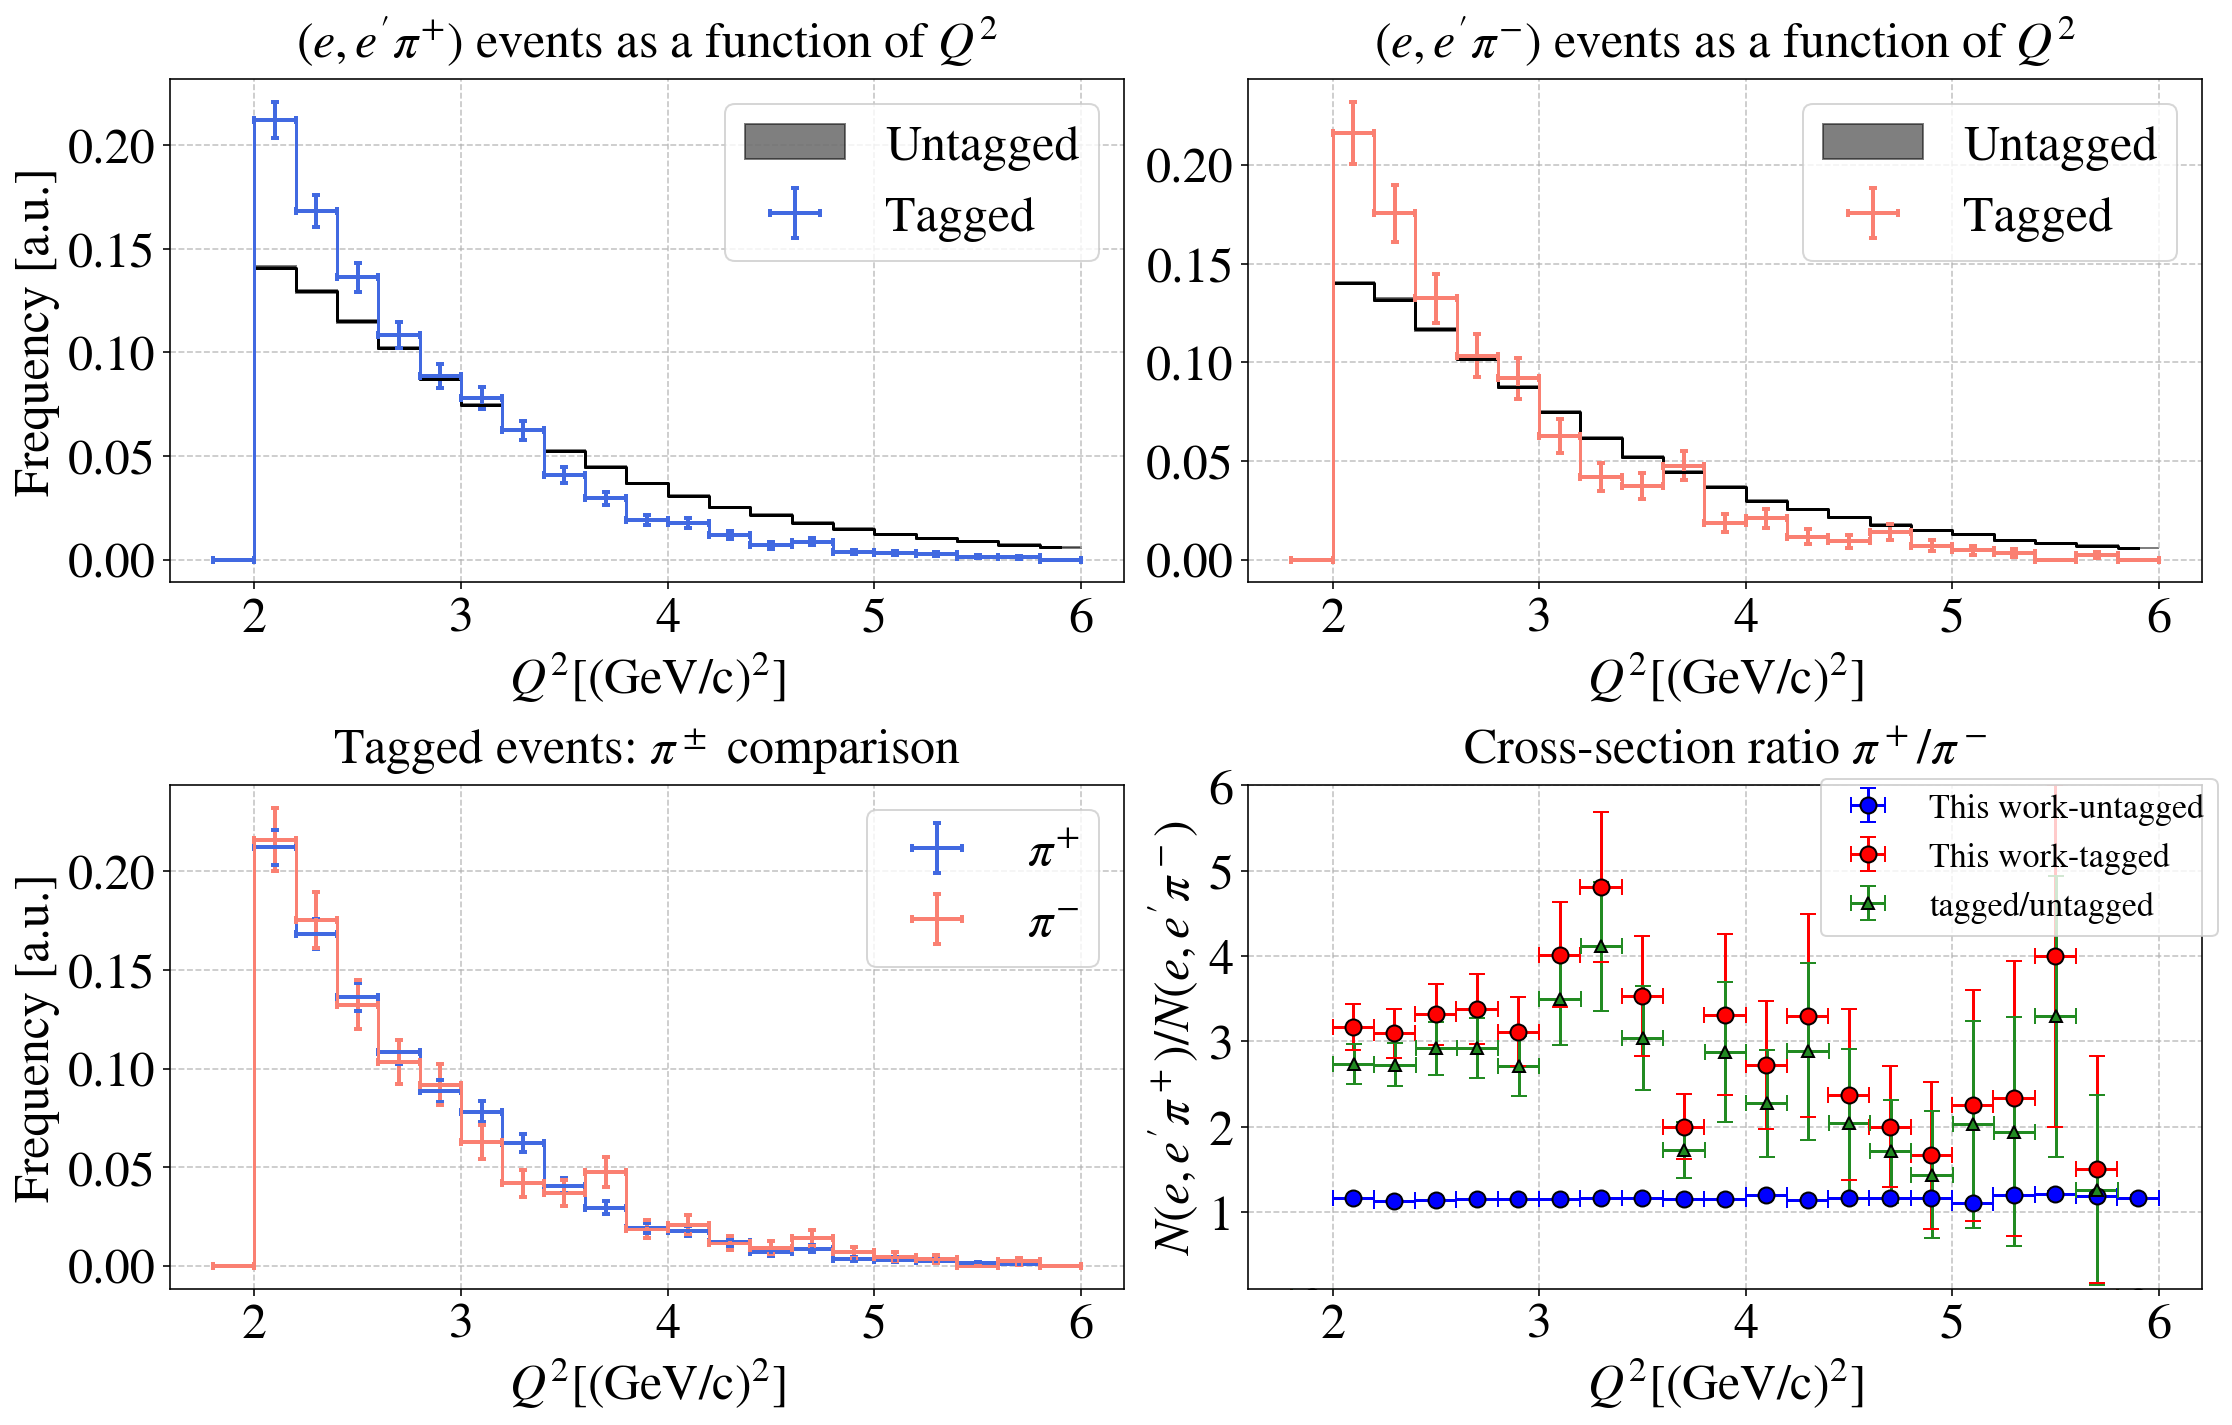

In [220]:
ax=plot_SIDIS_variable(var  = 'Q2',
                        bins = np.linspace(1.8,6,22),
                        varlabel = '$Q^2$',
                        varunits = '[(GeV/c)$^2$]',ylim_ratio=(0.1,6));
ax[4].legend(loc=(0.6,0.7),fontsize=17);

### (3.2) $x_B$ 

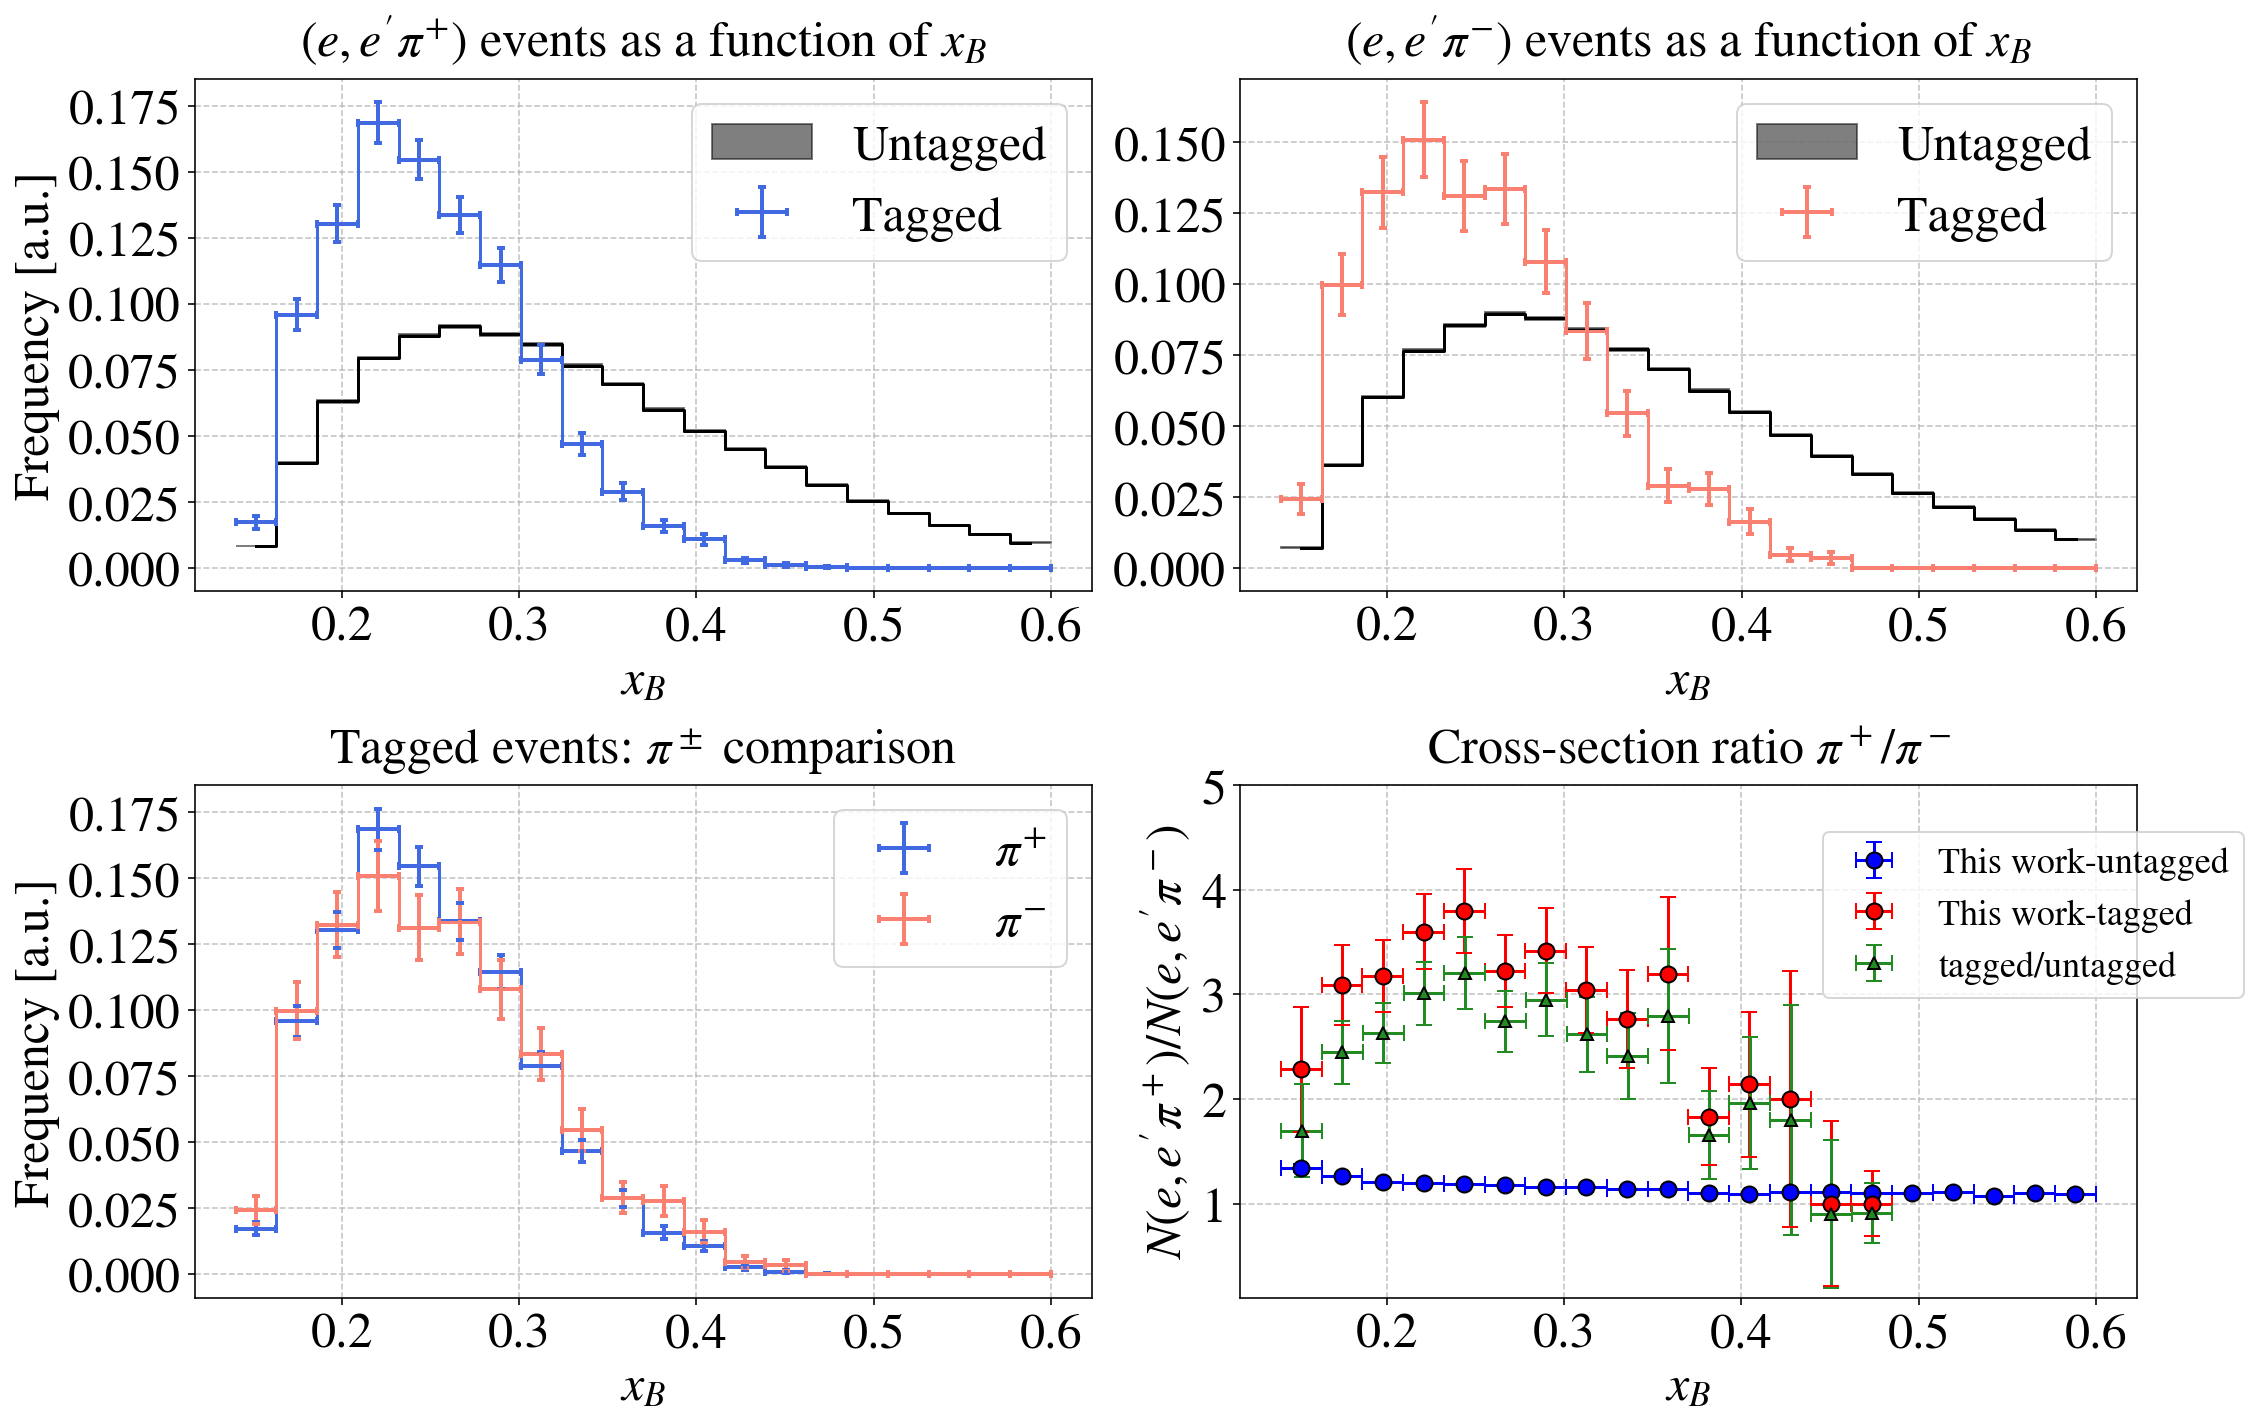

In [176]:
plot_SIDIS_variable(var  = 'xB',
                        bins = np.linspace(0.14,0.6,21),
                        varlabel = '$x_B$',
                        varunits = '',ylim_ratio=(0.1,5));

### (3.3) $W$

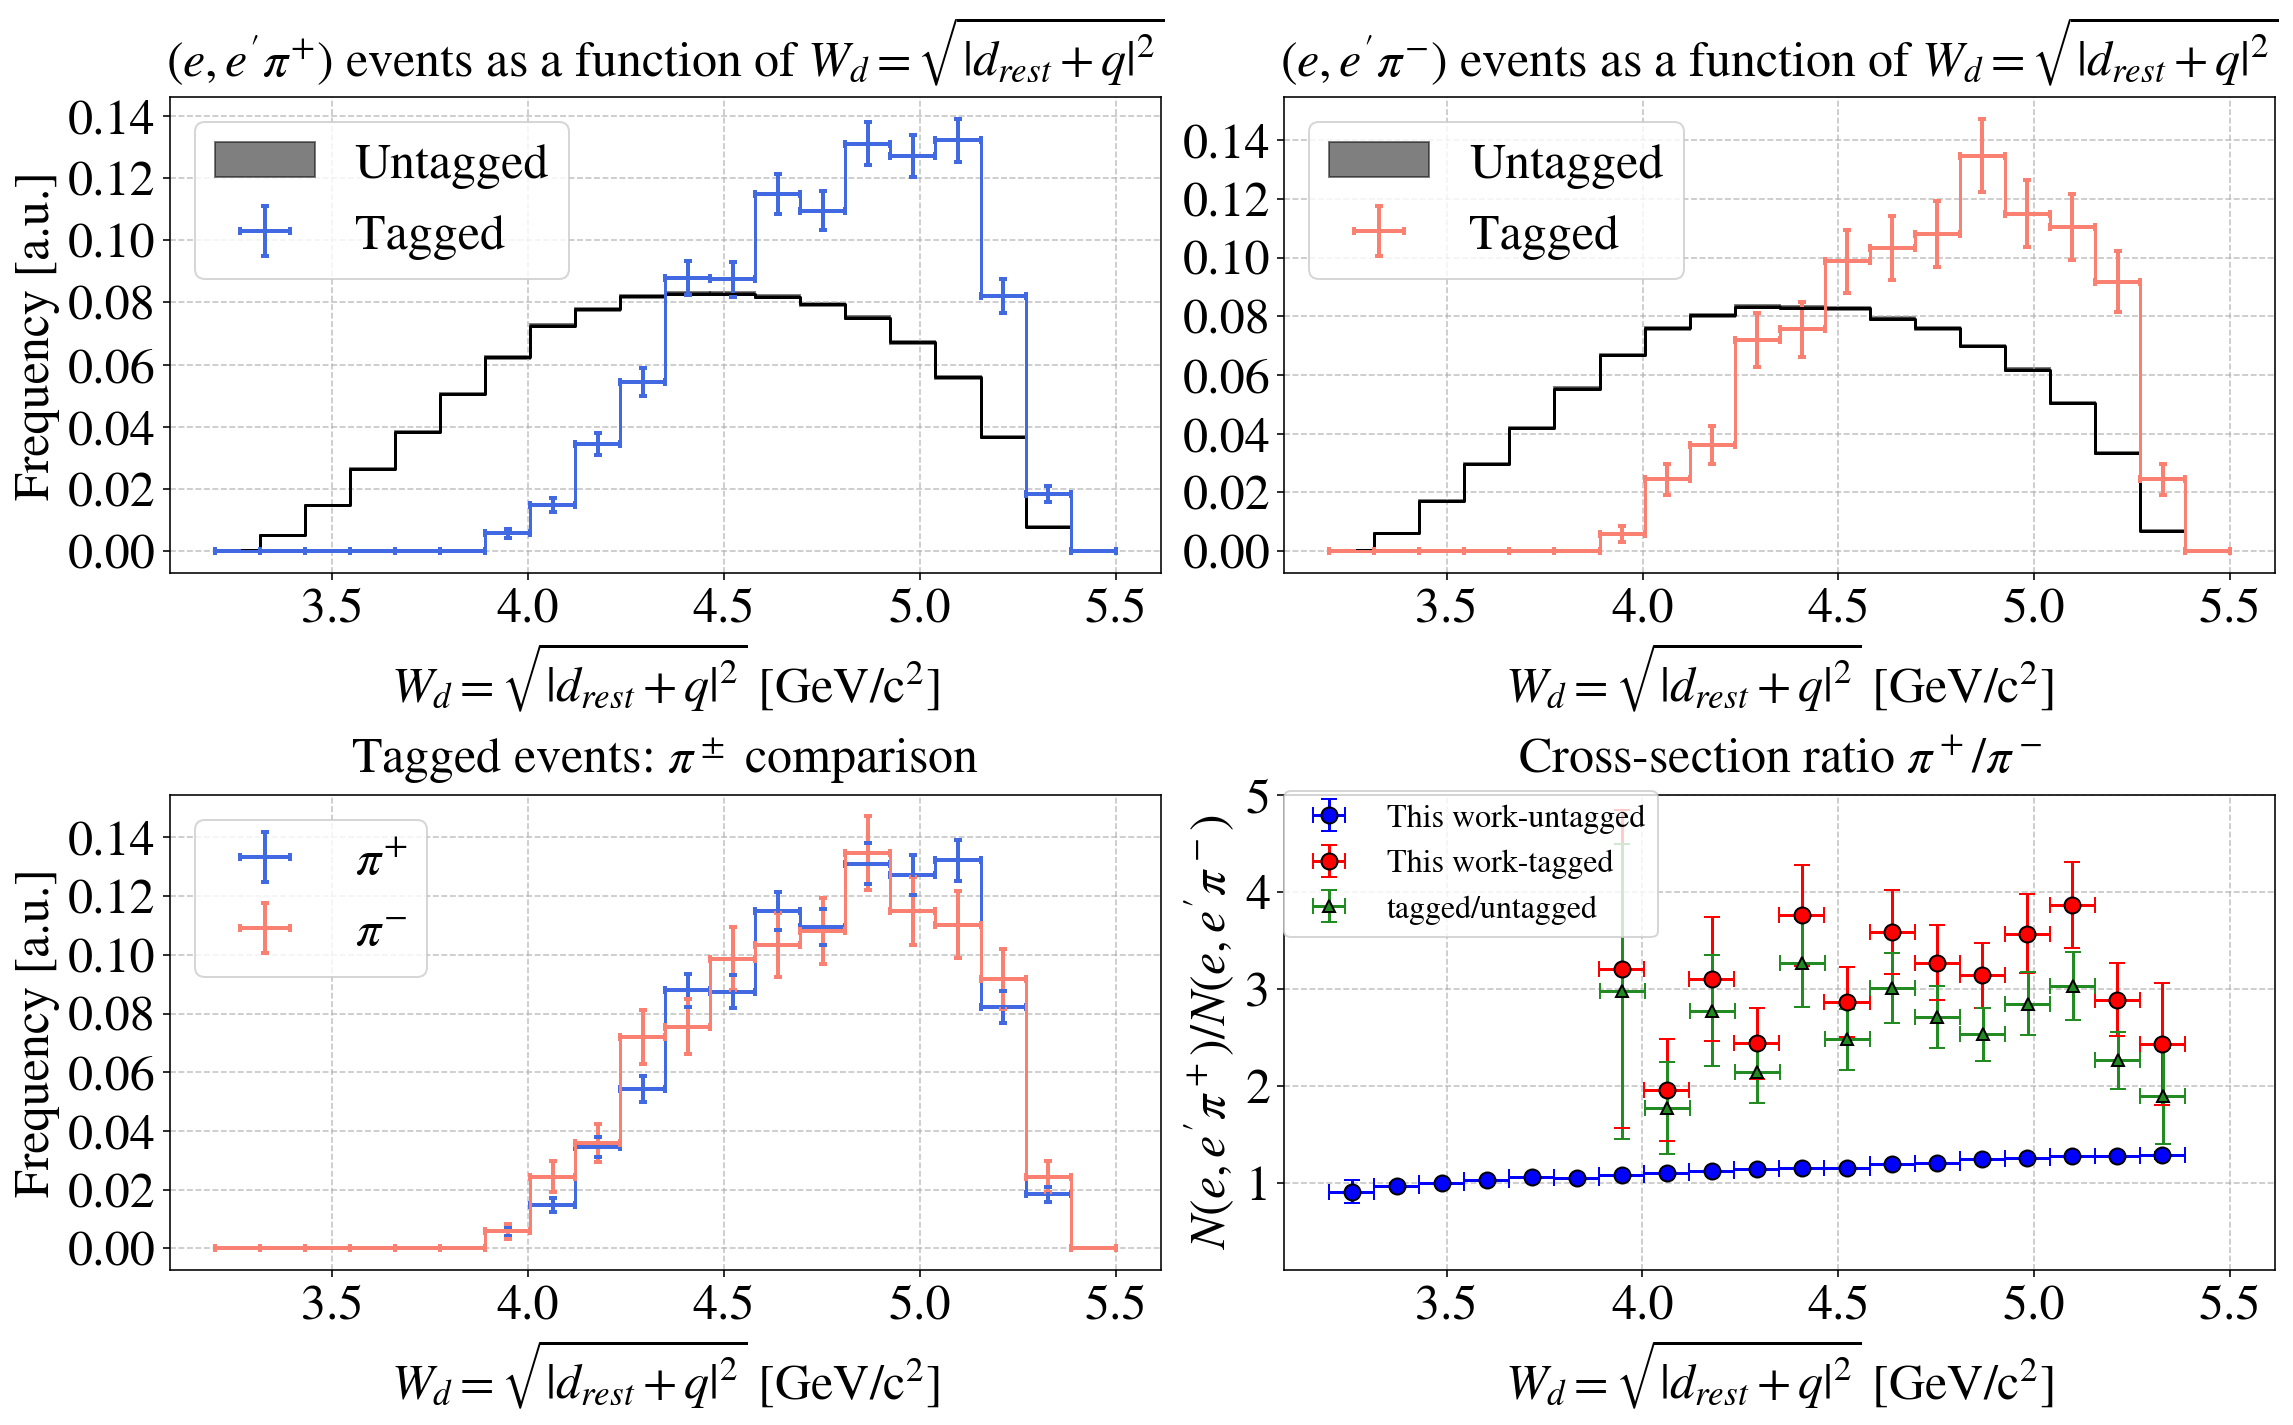

In [214]:
ax = plot_SIDIS_variable(var  = 'W_standing_d',                    
                    bins = np.linspace(3.2,5.5,21),                    
                    varlabel = '$W_d = \sqrt{|d_{rest} + q|^2}$',  
                    varunits = ' [GeV/c$^2$]', 
                    ylim_ratio=(0.1,5)
                   );
ax[4].legend(loc=(0,0.7),fontsize=16);

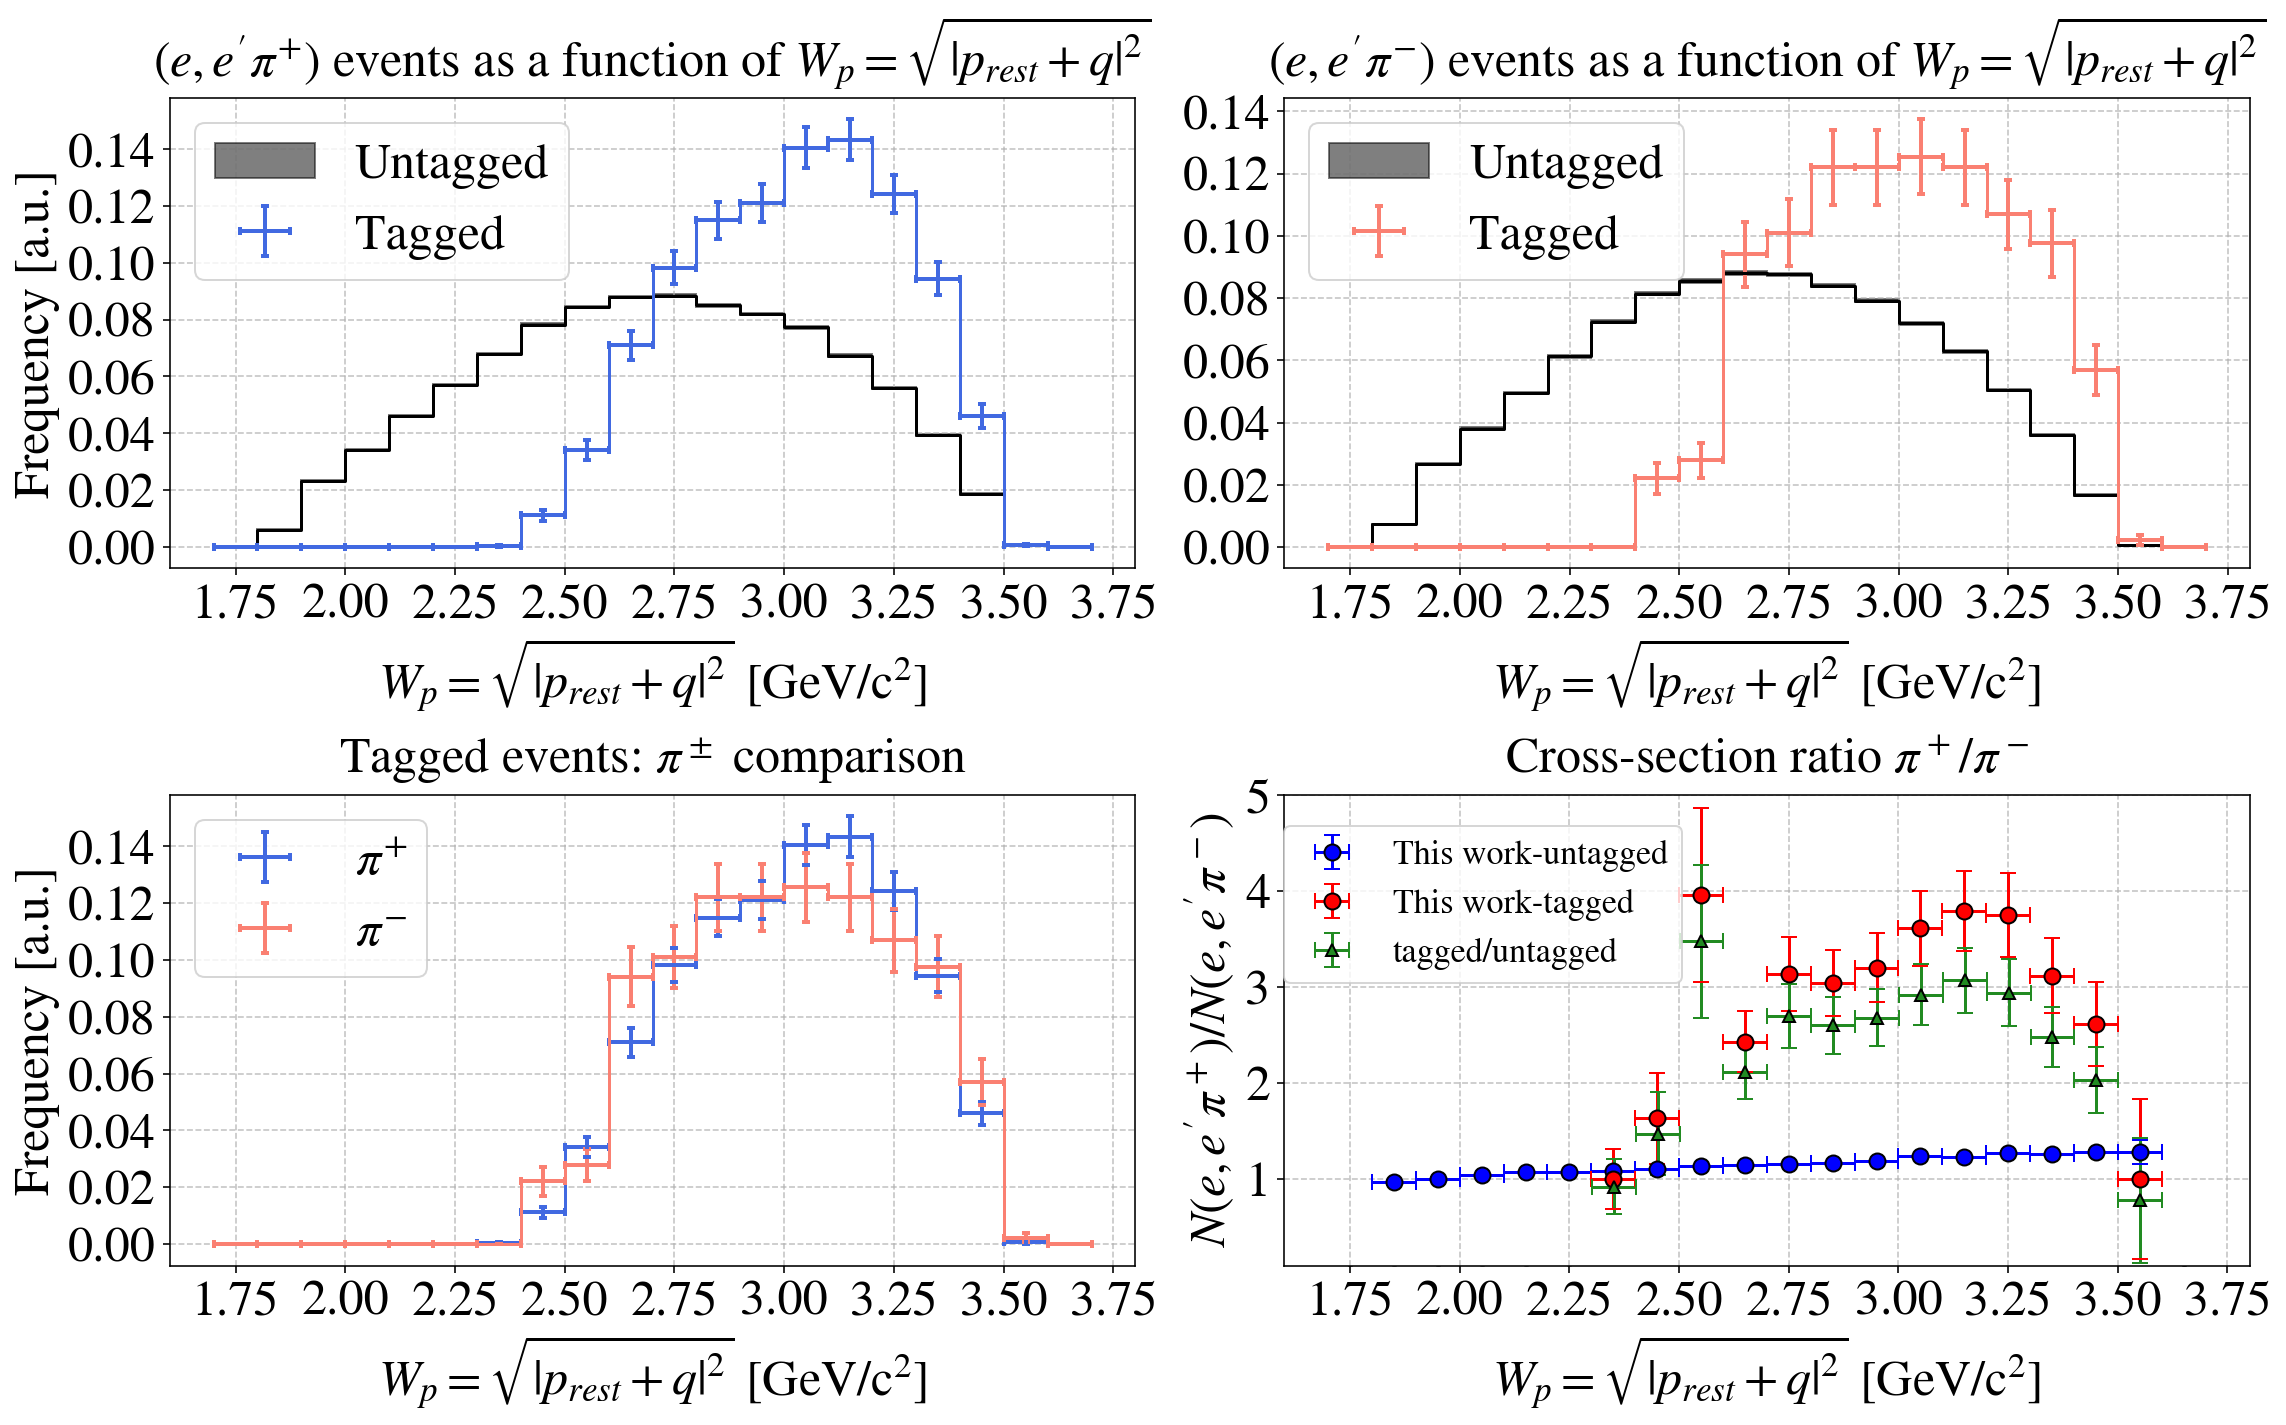

In [209]:
ax=plot_SIDIS_variable(var  = 'W_standing_p',                    
                    bins = np.linspace(1.7,3.7,21),                    
                    varlabel = '$W_p = \sqrt{|p_{rest} + q|^2}$',  
                    varunits = ' [GeV/c$^2$]', ylim_ratio=(0.1,5)
                   );
ax[4].legend(loc=(0.0,0.6),fontsize=17);

### (3.4) $z_{\pi}$

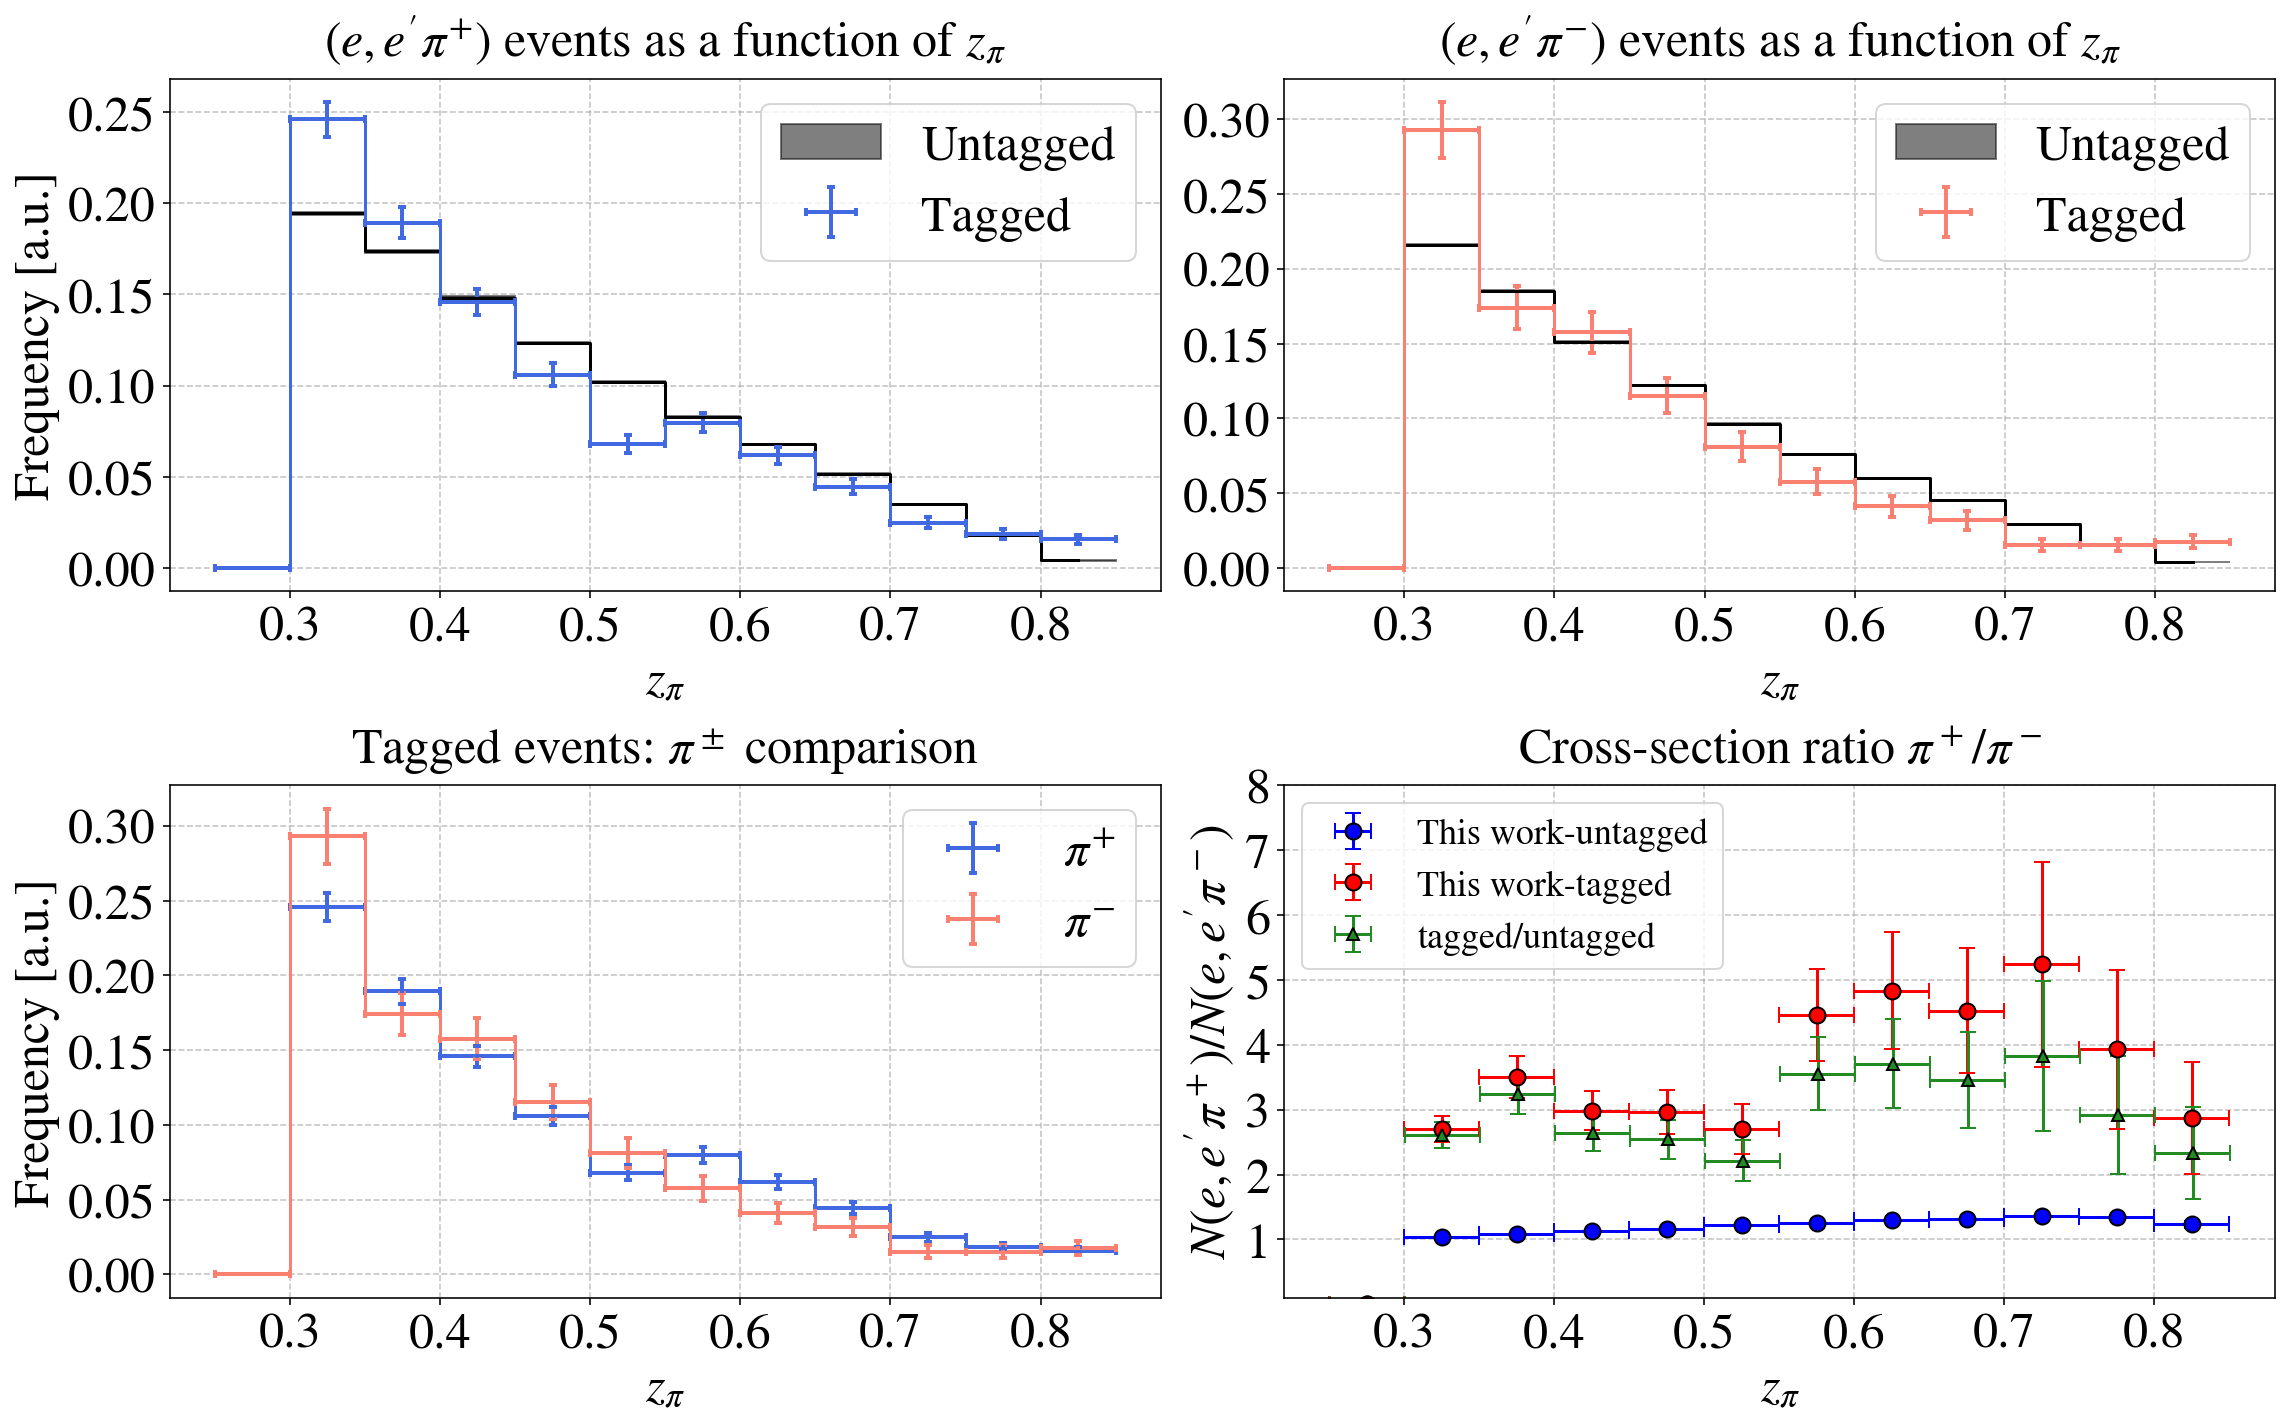

In [191]:
ax=plot_SIDIS_variable(var  = 'Zpi',                    
                    bins = np.linspace(0.25,0.85,13),  
                    varlabel = '$z_{\pi}$',                    
                    varunits = '',ylim_ratio=(0.1,8));
ax[4].legend(loc='best',fontsize=18);

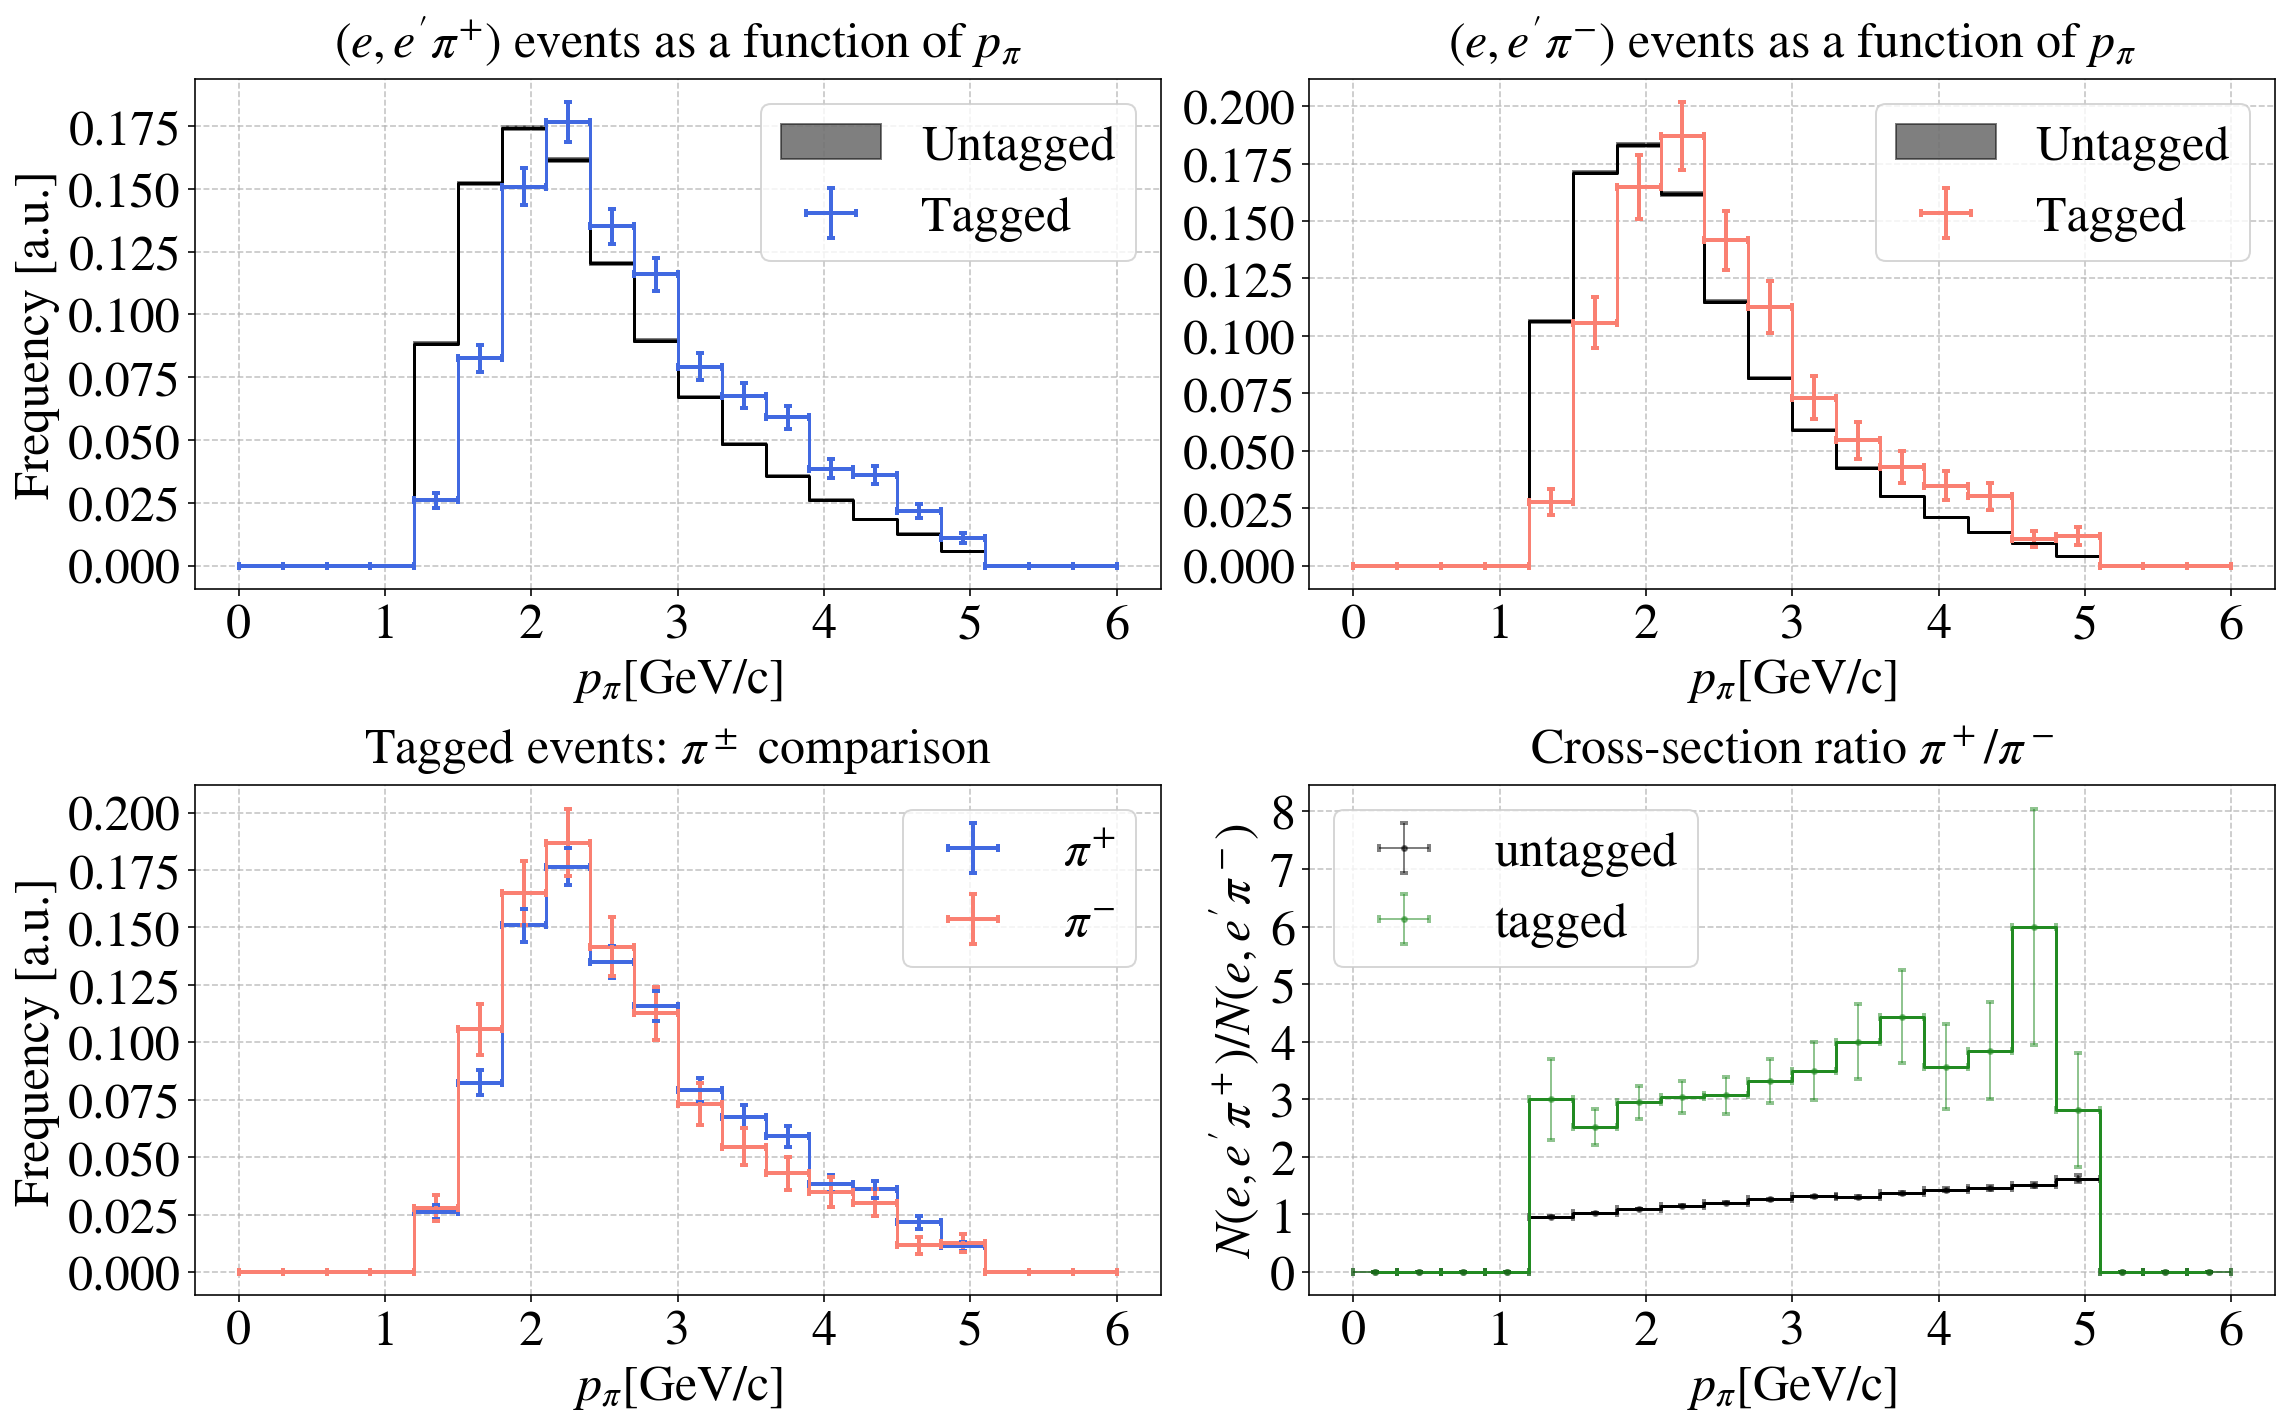

In [14]:
plot_SIDIS_variable(var  = 'pi_P',                    
                    bins = np.linspace(0,6,21),                    
                    varlabel = '$p_{\pi}$', 
                    varunits = '[GeV/c]')

### (3.5) $p_T$ in the $q$-frame

In [192]:
def plot_pT_published_pips2pims_ratio( dataset = 'JLAB2012', 
                                      ax=None, 
                                      vars_2_plot=['R_H','R_D'],
                                      labels_2_plot=['Free-p','Deuteron'],
                                      colors=['red','blue'],
                                      markers=['s','s'] ):
    '''
    plot pT published pips2pims ratio
    
    
    input
    ---------
    vars_2_plot    'R_H'  / 'R_D' / [...]
    dataset        'JLAB2012' - Phys. Rev. C. 85 015202 (2012)
    
    '''
    
    if dataset == 'JLAB2012':
        dataset_label = 'JLAB2012'
    
    pT_data = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/ExistingData/'+dataset+'/pT_data.csv')
    pT_data['p_T'] = np.sqrt(pT_data['P_t^2 (GeVc^2)'])
    
    if ax is None:
        fig,ax=plt.subplots(figsize=(8,5))
        set_axes(ax,'$p_T$','$R_H$',do_add_grid=True)
    
    for var_2_plot,label_2_plot,color,marker in zip(vars_2_plot,labels_2_plot,colors,markers):
        ax.errorbar( pT_data['p_T'], 
                    pT_data[var_2_plot], pT_data['d '+var_2_plot], 
                    linestyle='None',
                    marker=marker,color=color,
                    capthick=1,capsize=4,
                    markerfacecolor='w',
                    label = label_2_plot+' '+dataset_label
                   )
    
    

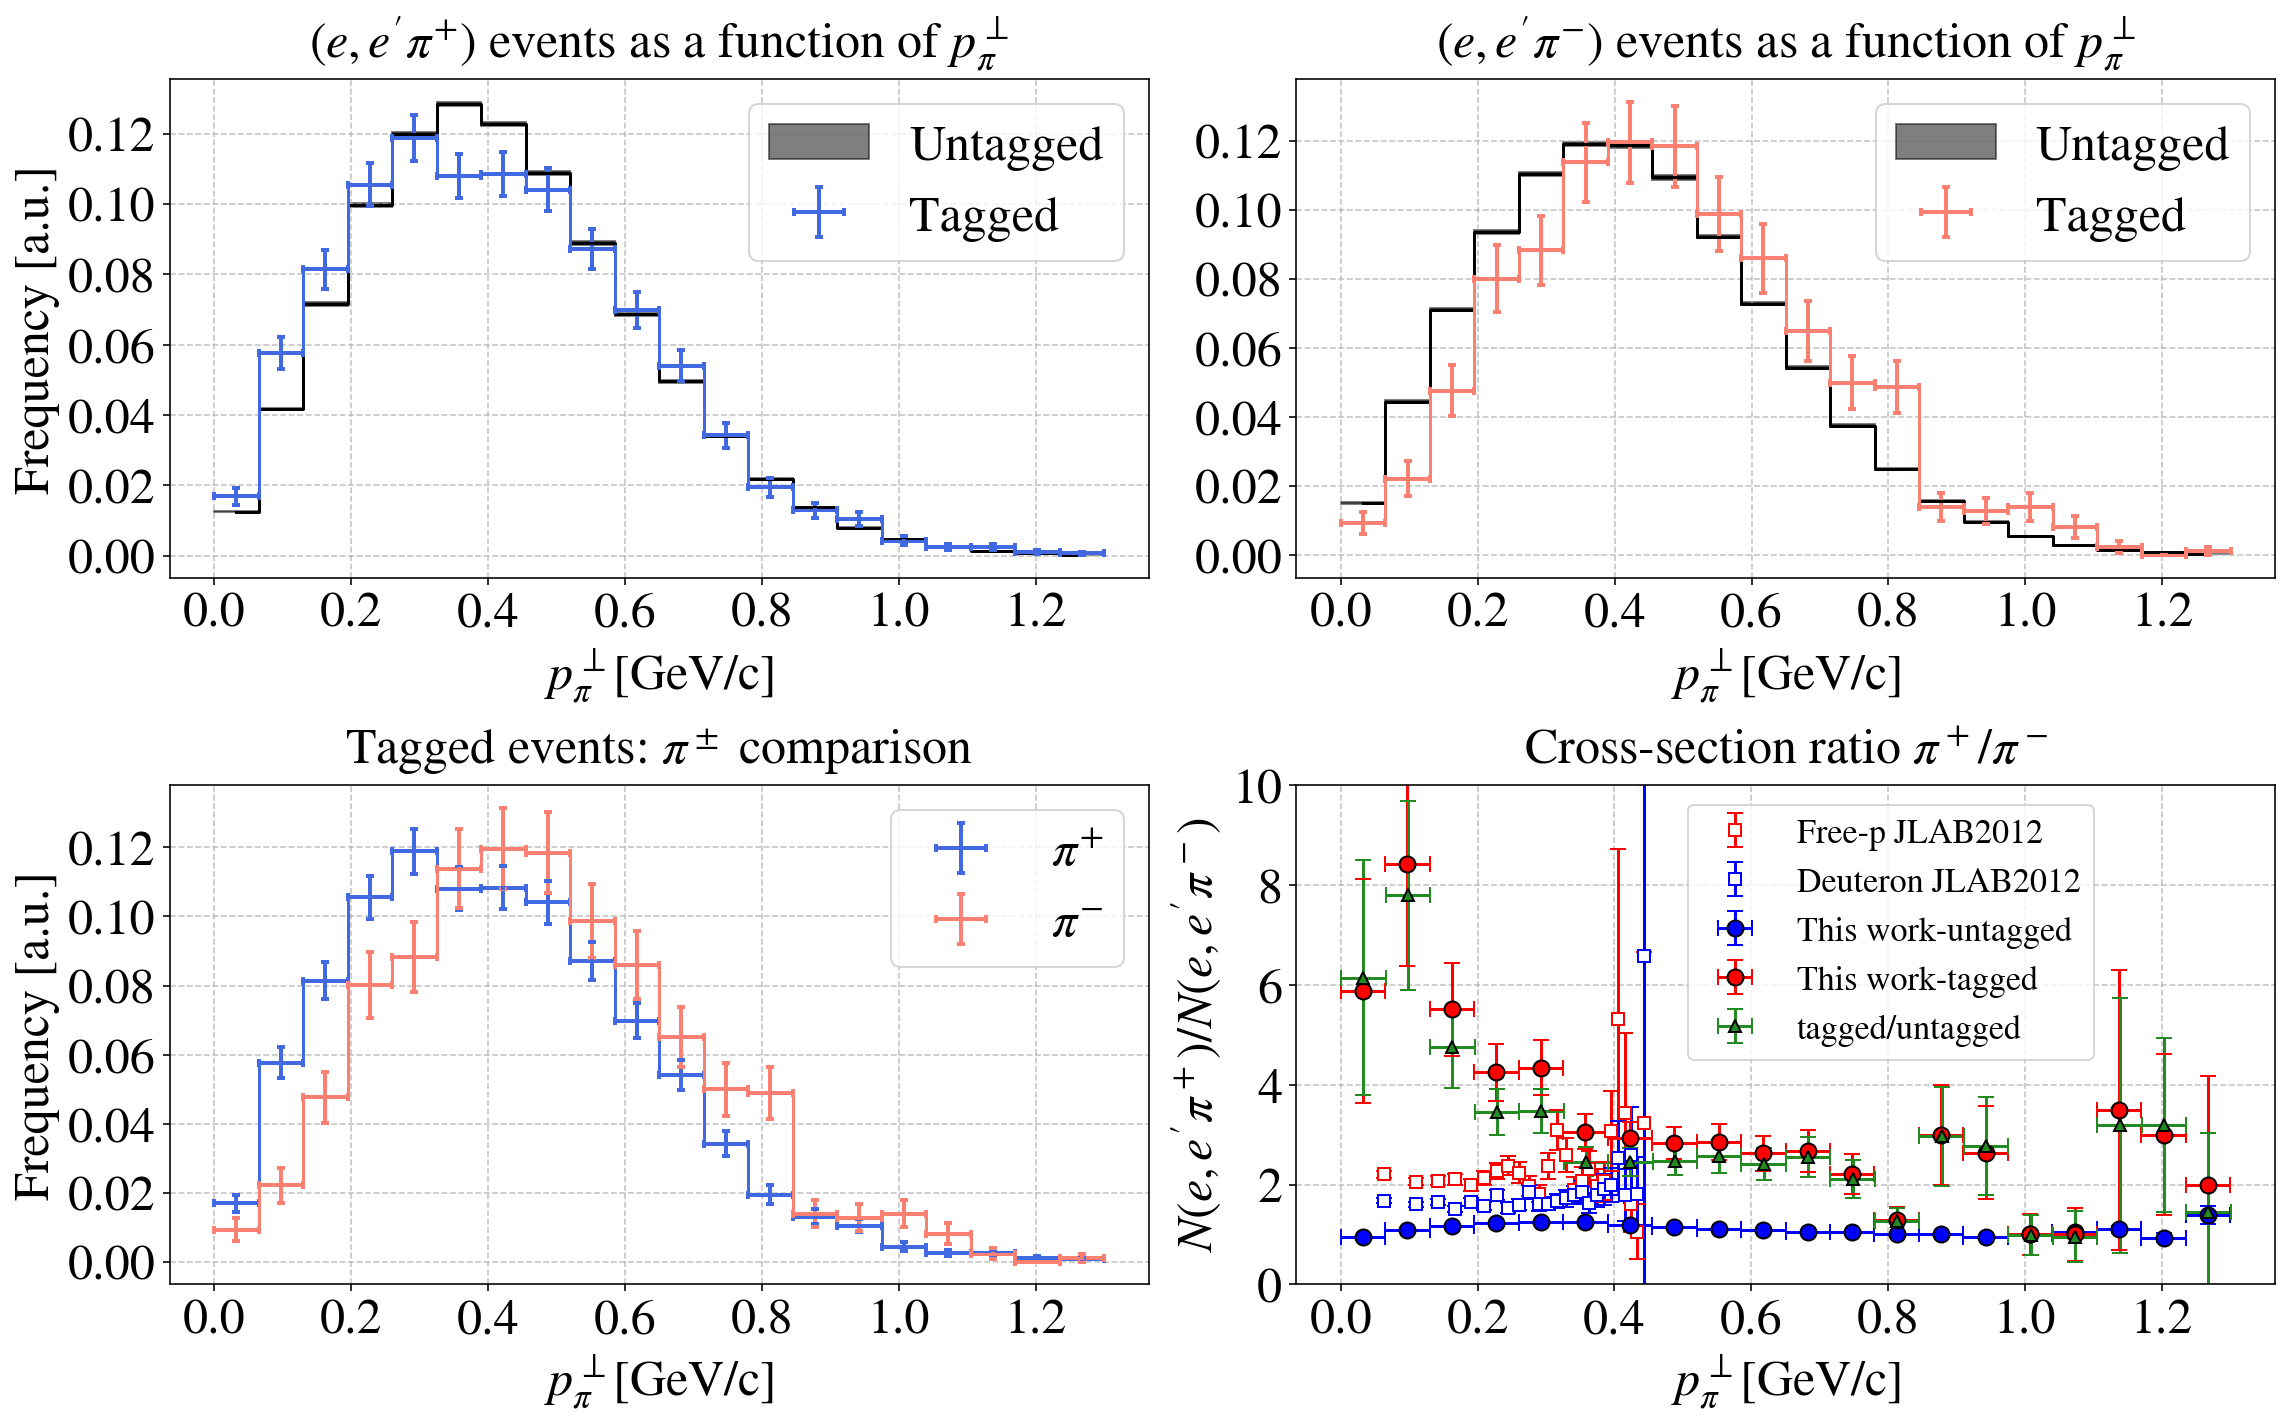

In [203]:
ax = plot_SIDIS_variable(var  = 'pi_pT_qFrame',                    
                    bins = np.linspace(0,1.3,21),                    
                    varlabel = '$p_{\pi}^{\perp}$', 
                    varunits = '[GeV/c]', 
                         add_published_pips2pims_ratio = ['JLAB2012'] )
ax[4].legend(loc=(0.4,0.45),fontsize=17);


### (3.7.1) $\phi$ in the virtual photon frame

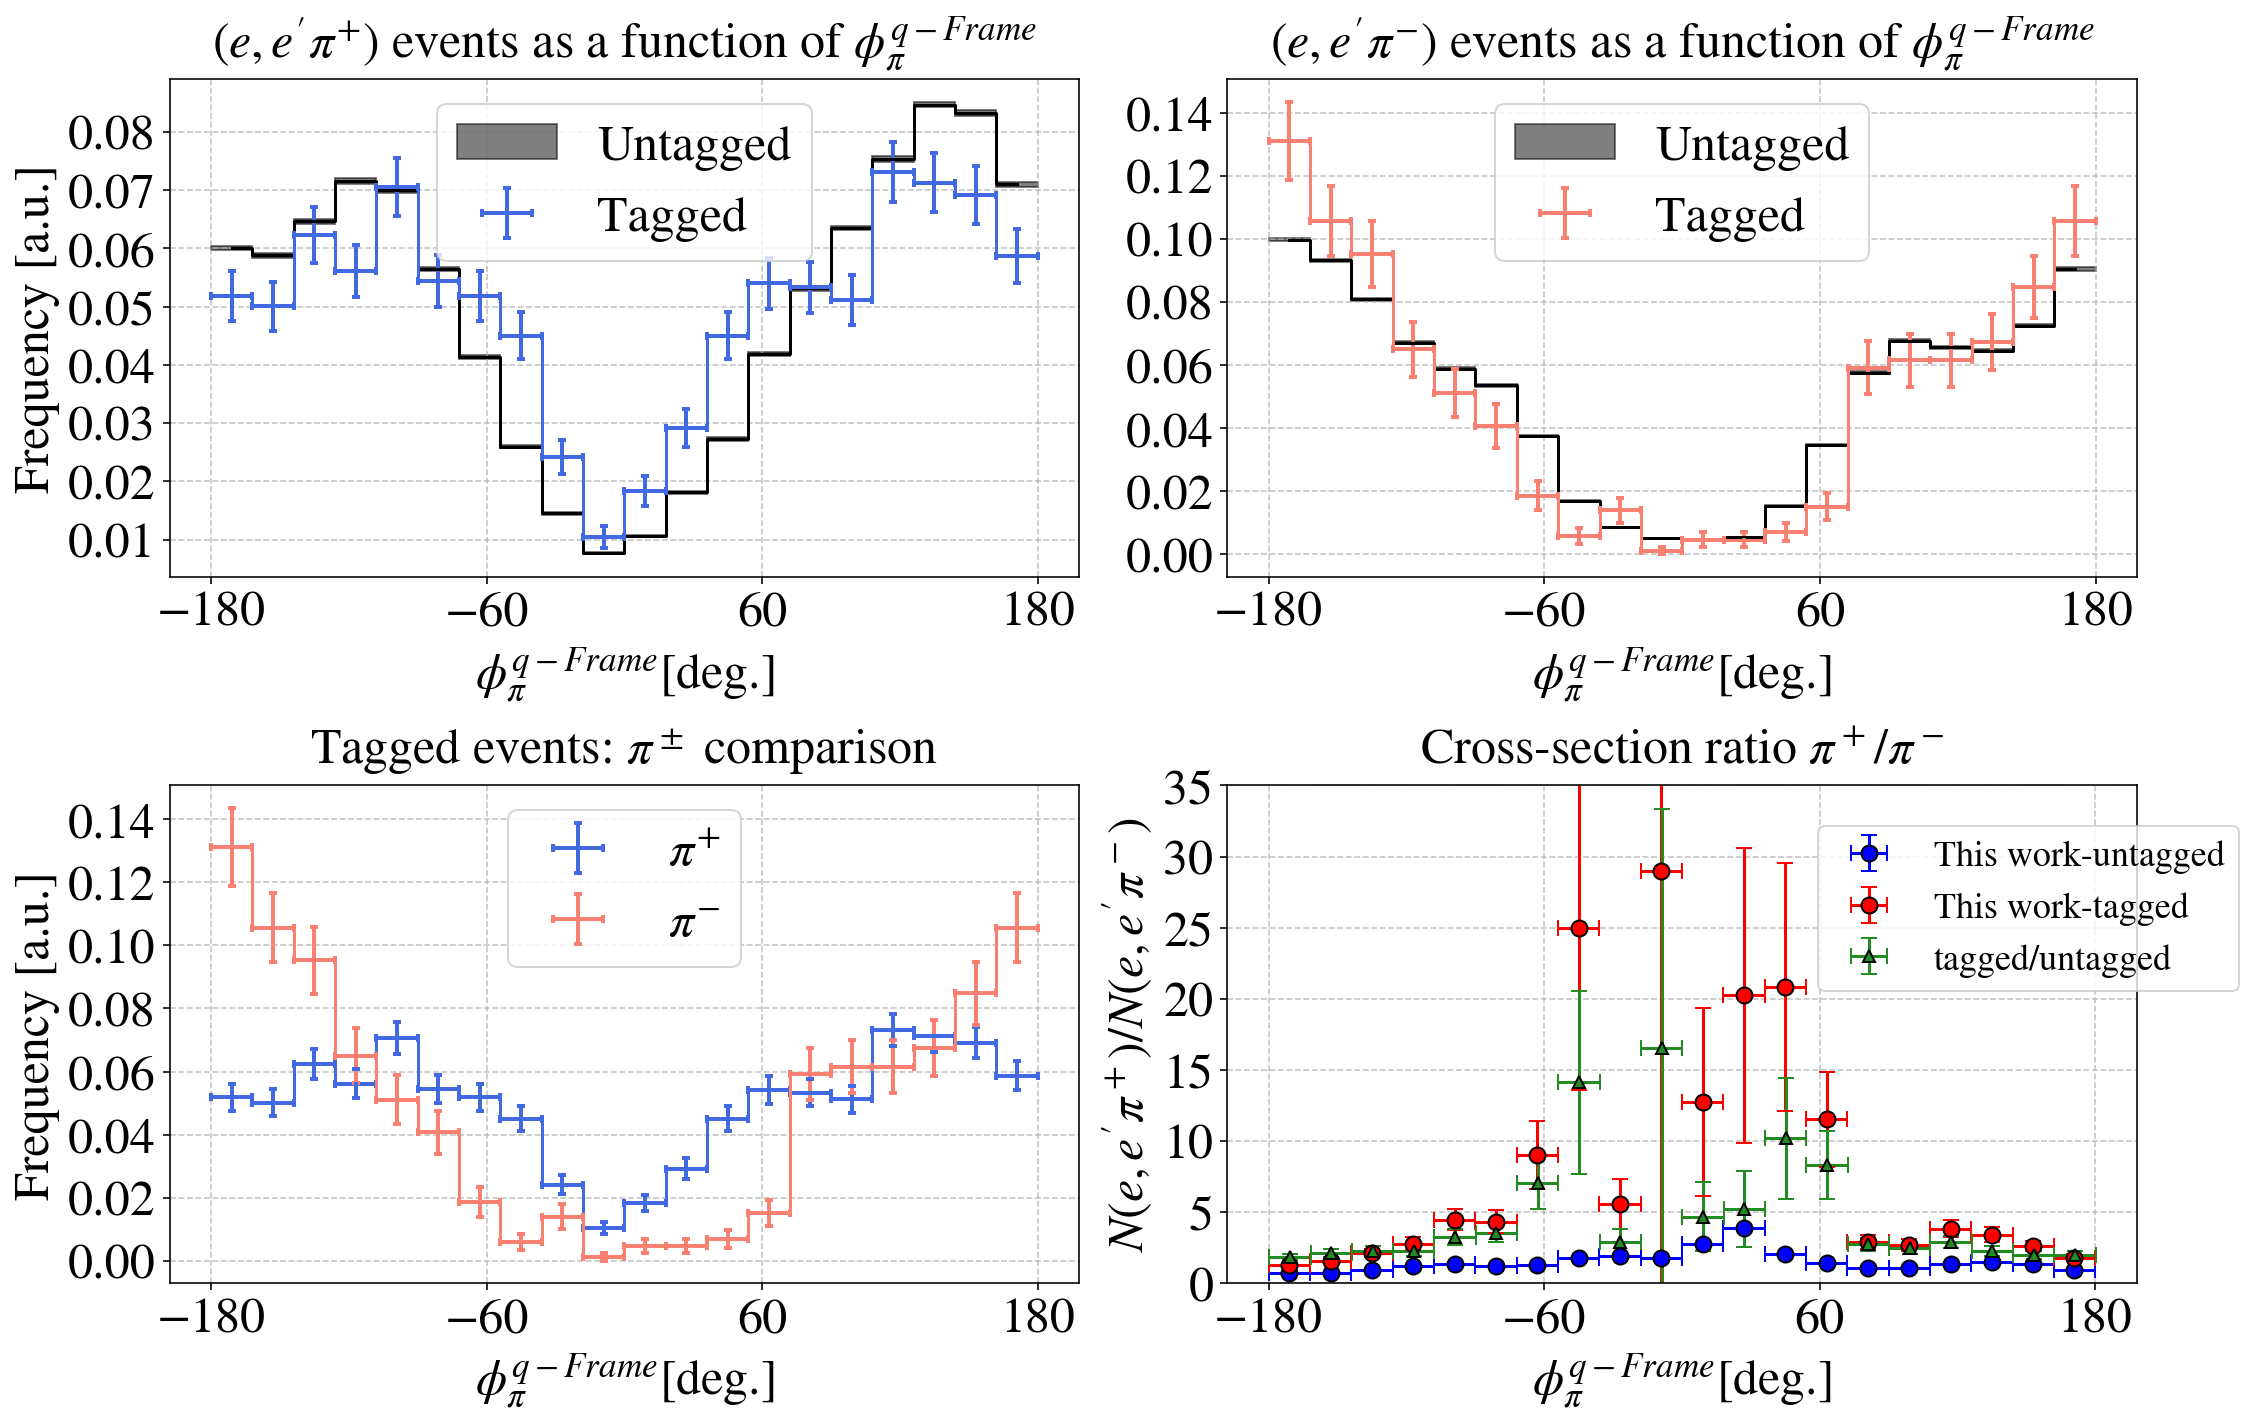

In [221]:
plot_SIDIS_variable(var  = 'pi_Phi_qFrame',       
                    xScaling=r2d,
                    bins = np.linspace(-180,180,21),
                    varlabel = "$\phi_{\pi}^{q-Frame}$", 
                    varunits = '[deg.]',ylim_ratio=(0,35),
                    xticks=[-180,-60,60,180]);

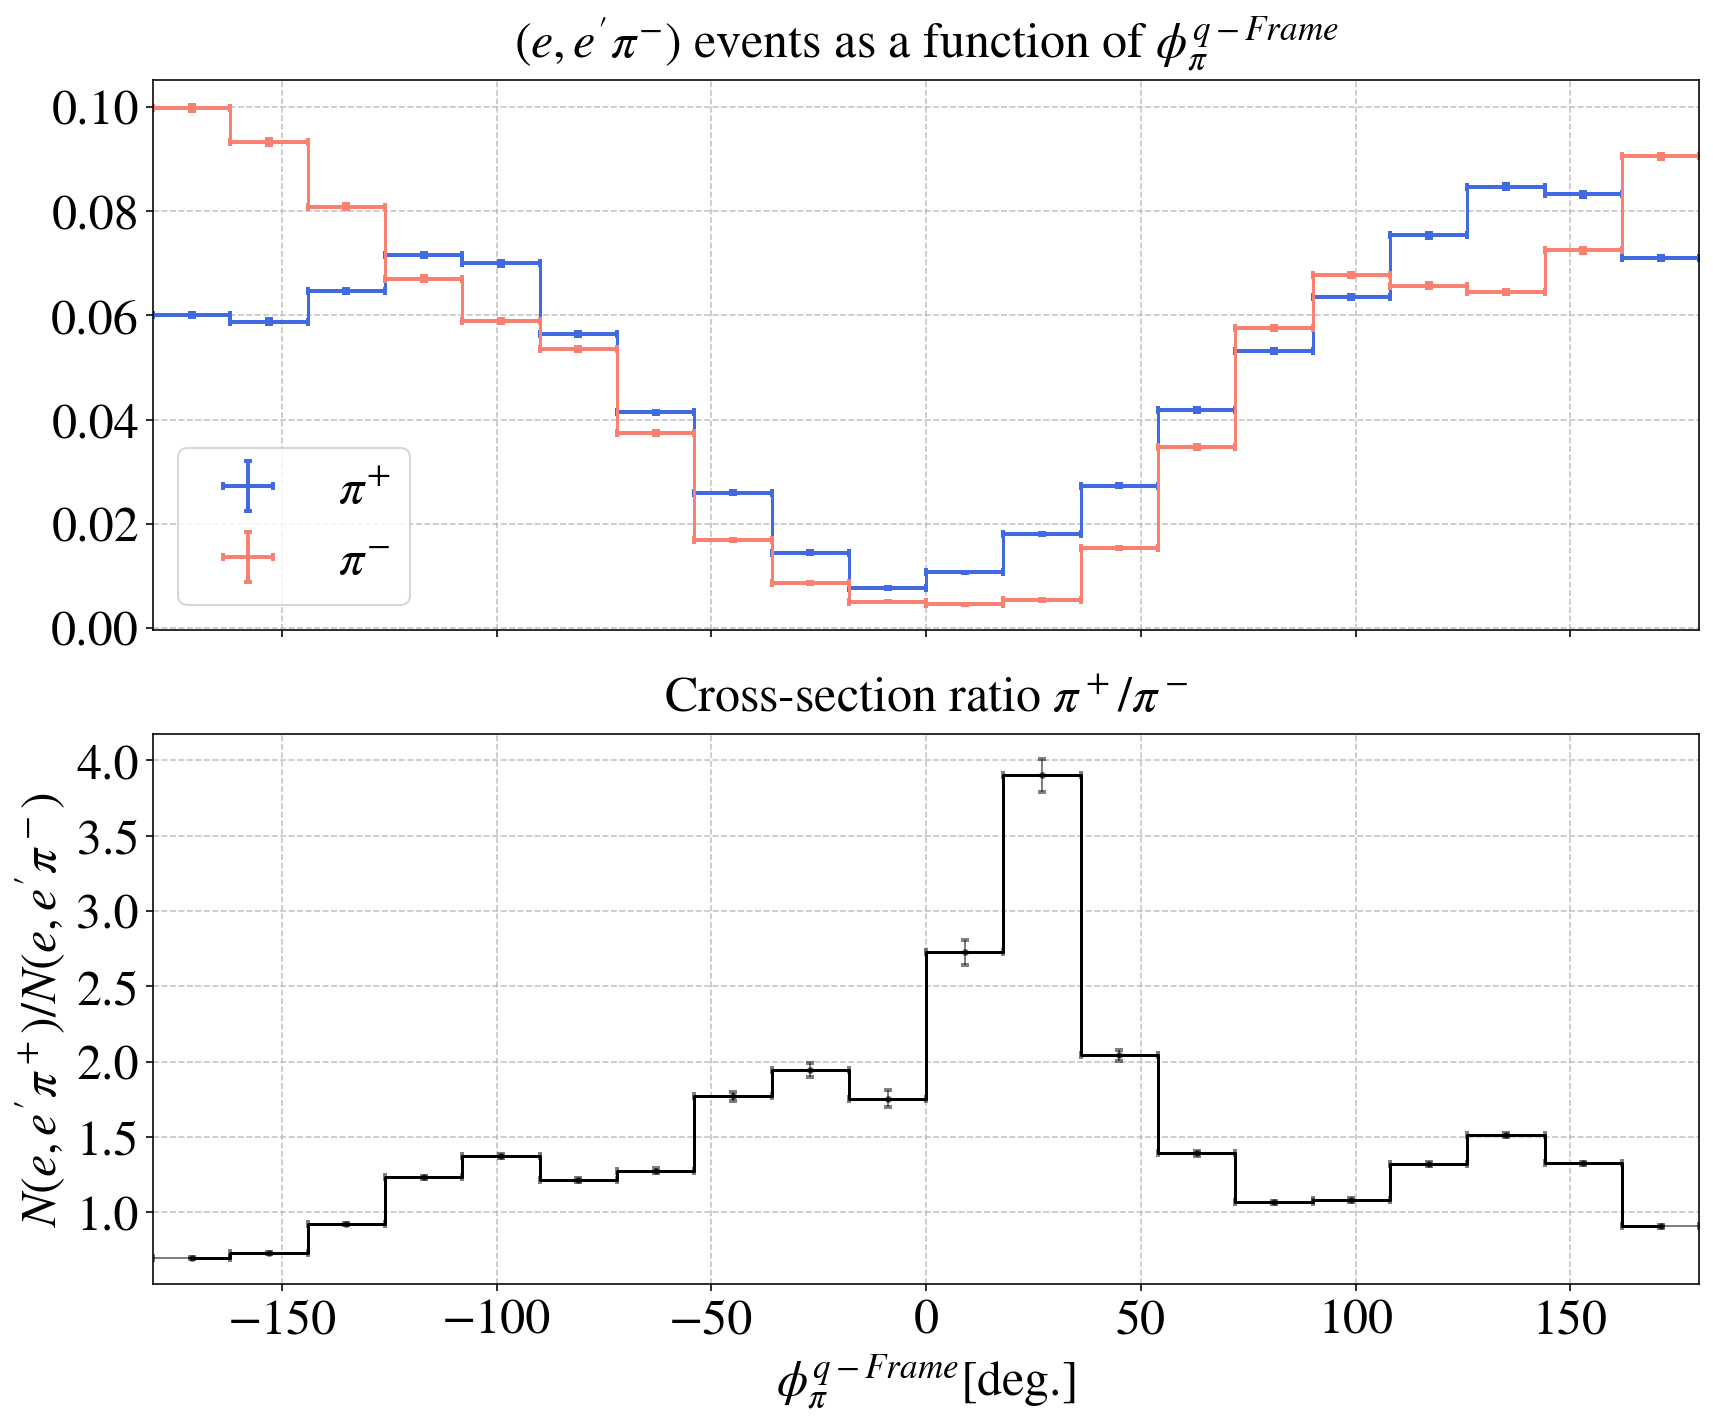

In [16]:
var      = 'pi_Phi_qFrame'
varlabel = "$\phi_{\pi}^{q-Frame}$"
varunits = "[deg.]"

bins = np.linspace(-180,180,21)
xlim = (-180,180)
xticks = None

fig = plt.figure(figsize=(12,10),tight_layout=True)
h,NeventsTot = dict(),dict()
# compare untagged to tagged seperately for π+ and π-
ax = fig.add_subplot(2,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    
    df = e_e_pi_pass_cuts[pi_ch]
    NeventsTot['untagged'] = len(df)
    x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_hist( df[var], xScaling=r2d,
                                                                         bins=bins, 
                                                                         marker='s', 
                                                                         markersize=1, 
                                                                         color=pi_color,
                                                                         label='$'+pi_label+'$', 
                                                                         alpha=1, density=True)
    
set_axes(ax,'', 'Frequency [a.u.]' if pi_idx==1 else '', 
         remove_ticks_x=True,
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True,xticks=xticks, xlim=xlim)

# Take the ratio of π+/π-
ax = fig.add_subplot(2,1,2)
datalabel='untagged'
color='k'
scaleFactor = Stats["$(e,e'\\pi^{+})/(e,e'\\pi^{-})$"]
R = np.zeros(len(x))
R_err = np.zeros(len(x))
cutoff = 1./NeventsTot[datalabel]
for i in range(len(h_err[datalabel+'piminus'])):
    R[i] = (h[datalabel+'piplus'][i]/np.max([cutoff,h[datalabel+'piminus'][i]])) * scaleFactor
    R_err[i] = R[i] * np.sqrt(  np.square(h_err[datalabel+'piplus'][i]/np.max([cutoff,h[datalabel+'piplus'][i]]) ) 
                              + np.square(h_err[datalabel+'piminus'][i]/np.max([cutoff,h[datalabel+'piminus'][i]])) )    
plt.step ( x, R, color=color, where='mid', label=None )
plt.errorbar ( x=x, xerr=x_err, y=R, yerr=R_err, markersize=5,
              color=color, marker='.', linestyle='None',label=datalabel,
              capsize=2, capthick=2, linewidth=1, alpha=0.5 )
#}
set_axes(ax,varlabel+varunits,
         "$N(e,e' \pi^+) / N(e,e' \pi^-)$", 
         title="Cross-section ratio $\pi^+/\pi^-$",
         do_add_grid=True, do_add_legend=False,xticks=xticks, xlim=xlim);   

### (3.6) $p_T$ in bins of $x_B$ and $z$
For untagged data in bins of x and z
For tagged data in 2-3 large bins

#### Untagged data

In [ ]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

In [ ]:
N_x = len(x)
N_z = len(z_bins)

In [ ]:
bins = np.linspace(0,1.3,16)
Nsubplots = 25
i = 0
for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{
    z_min,z_max = z_bin-z_width, z_bin+z_width

    # if i>25: break
    for x_min,x_max,x_idx in zip(x_bins[:-1],x_bins[1:],range(N_x)):#{
        
        if i%Nsubplots==0: fig = plt.figure(figsize=(20,12),tight_layout=True)
        # ax = fig.add_subplot( N_x,  N_z, z_idx + N_z*x_idx + 1 )
        ax = fig.add_subplot( int(np.sqrt(Nsubplots)), int(np.sqrt(Nsubplots)), np.mod(i,Nsubplots)+1 )
        for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

            df = e_e_pi_pass_cuts[pi_ch]
            # cut on xB and z
            df = df[  (z_min < df.Zpi) & (df.Zpi < z_max) 
                    & (x_min < df.xB ) & (df.xB  < x_max) ]
            # plot
            plot_step_hist( df.pi_pT_qFrame, bins = bins, color=pi_color, density=True )
                
        set_axes(ax,'$p_{\pi}^{\perp}$ [GeV/c]' if np.mod(i,Nsubplots)>=Nsubplots-np.sqrt(Nsubplots) else '',
                 '', # 'Frequency [a.u.]' if z_idx==0 else '', 
                 title= "$%.3f < z < %.3f$"%(z_min,z_max) + "\n" + "$%.2f < x_B < %.2f$"%(x_min,x_max) ,
                 fontsize=16,
                 remove_ticks_x = False if np.mod(i,Nsubplots)>=Nsubplots-np.sqrt(Nsubplots) else True,
                 remove_ticks_y = True,
                 do_add_grid=True, 
                 do_add_legend=False)
        i = i+1        
    #}    
#}

#### Tagged data

In [ ]:
z_bins   = np.array([0.35,0.45,0.65])
z_widths = np.array([0.05,0.05,0.15])
x_bins   = np.array([0.2, 0.32, 0.44 ])
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

In [ ]:
N_x = len(x)
N_z = len(z_bins)

In [ ]:
bins = np.linspace(0,1.3,16)

fig = plt.figure(figsize=(18,10),tight_layout=True)

for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{
    z_min,z_max = z_bin-z_width, z_bin+z_width

    for x_min,x_max,x_idx in zip(x_bins[:-1],x_bins[1:],range(N_x)):#{
        ax = fig.add_subplot( N_x,  N_z, z_idx + N_z*x_idx + 1 )
        for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

            df = e_e_pi_n_pass_cuts[pi_ch]
            # cut on xB and z
            df = df[  (z_min < df.Zpi) & (df.Zpi < z_max) 
                    & (x_min < df.xB ) & (df.xB  < x_max) ]
            # plot
            plot_step_hist( df.pi_pT_qFrame, bins = bins, color=pi_color, density=True )
            
        set_axes(ax,'$p_{\pi}^{\perp}$ [GeV/c]' if x_idx >= 1 else '',
                 'Frequency [a.u.]' if z_idx==0 else '', 
                 title= "$%.1f < z < %.1f$"%(z_min,z_max) + ", " + "$%.2f < x_B < %.2f$"%(x_min,x_max) ,
                 remove_ticks_x = False if x_idx >= 1 else True,
                 remove_ticks_y = False if z_idx%N_z==0 else  True,
                 do_add_grid=True, 
                 do_add_legend=False if z_idx==0 and x_idx==1 else False)
    #}    
#}

### (3.7) $W$ vs $M_{miss}$

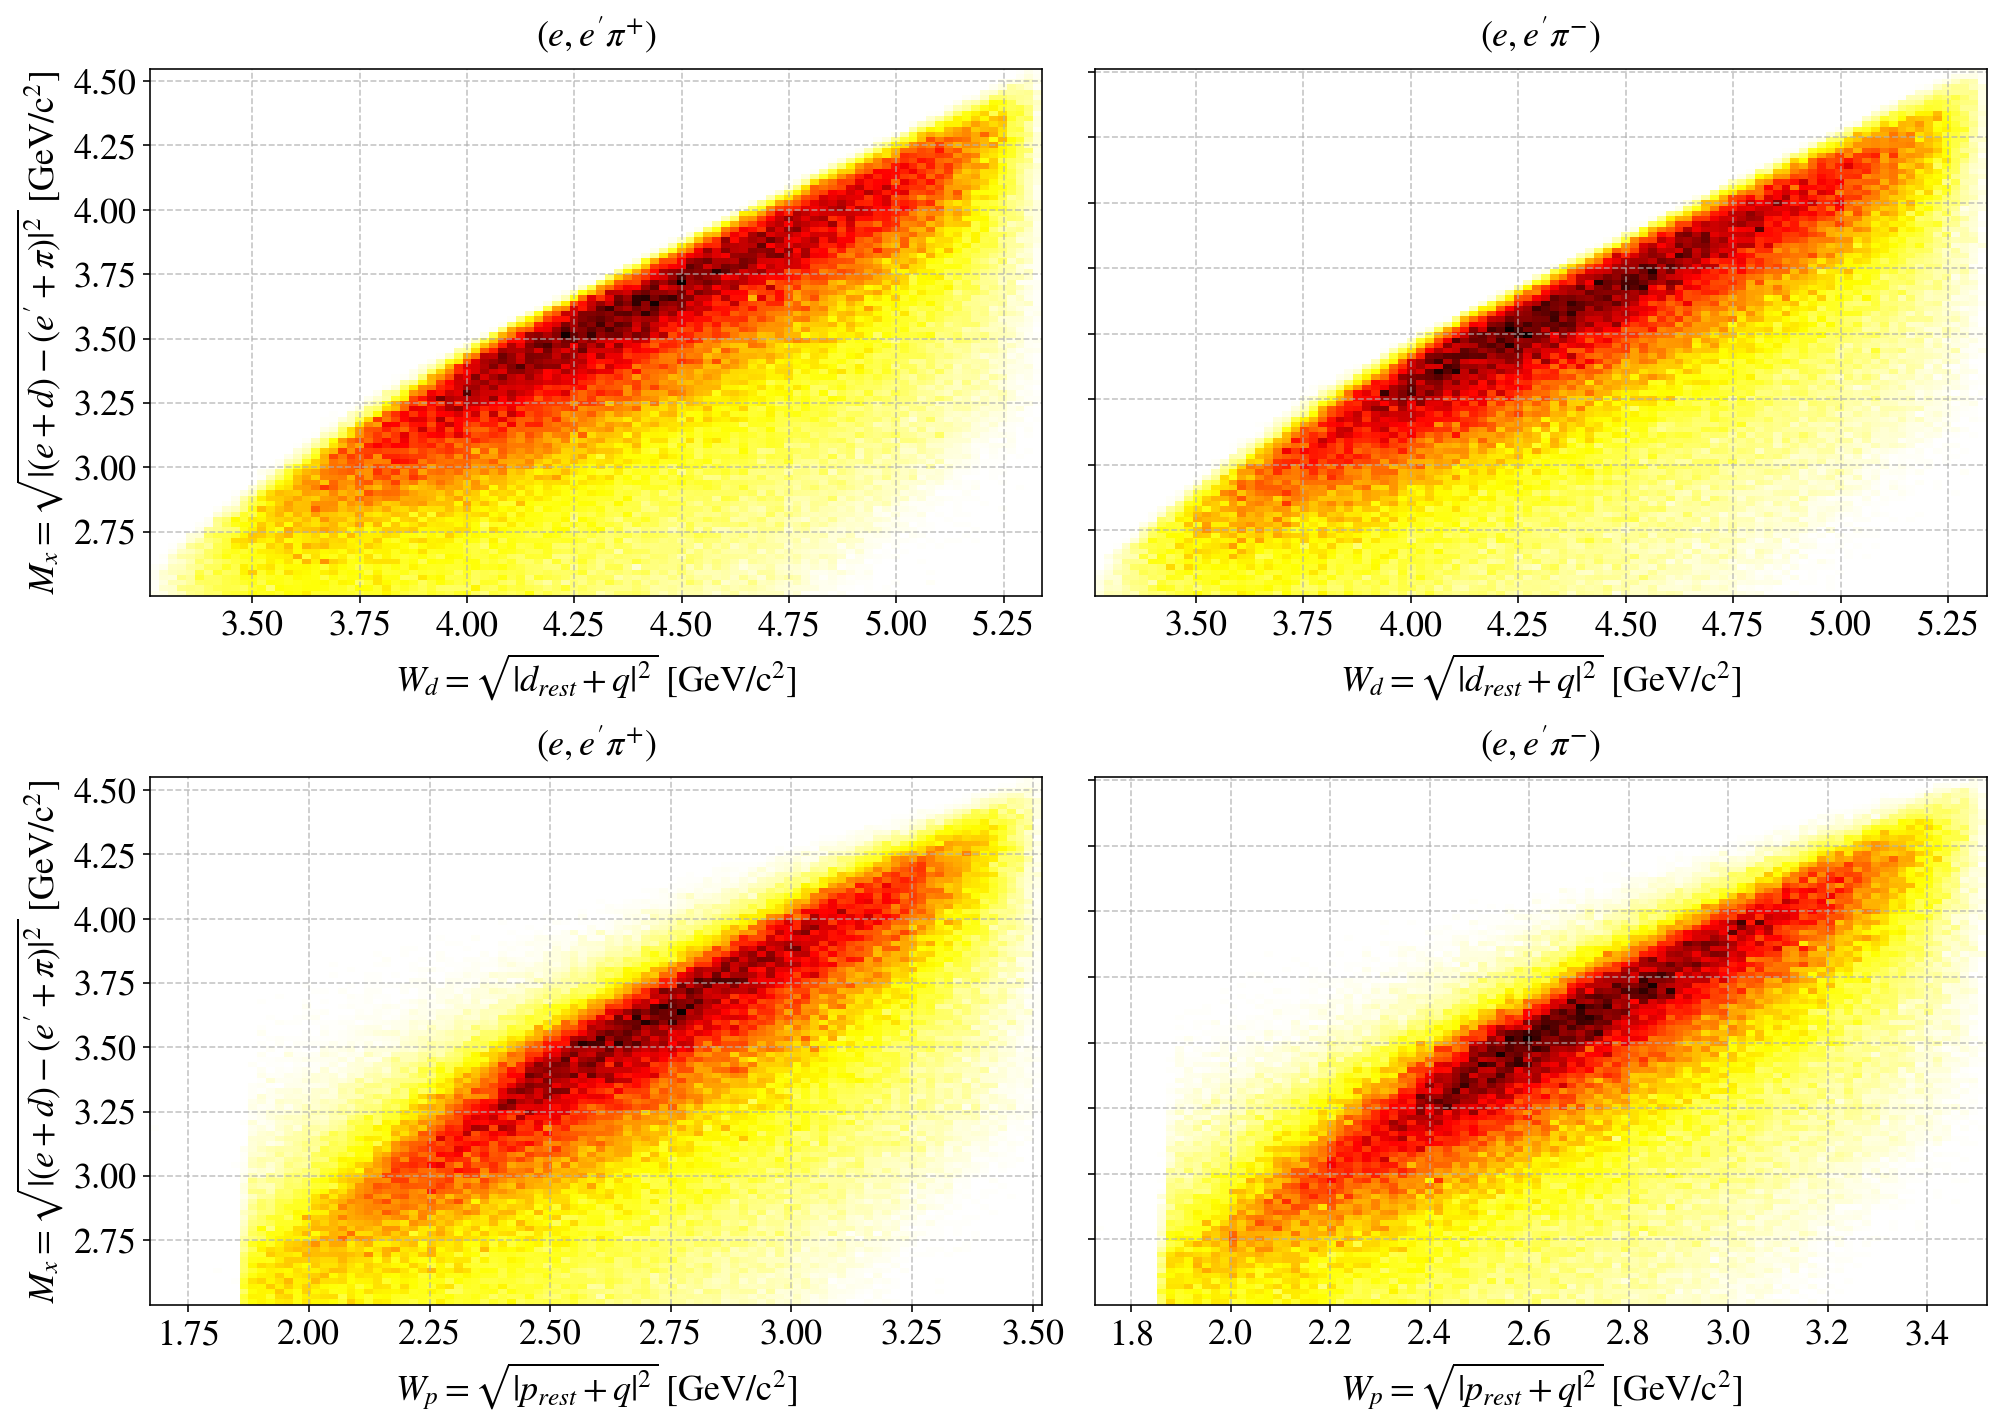

In [145]:
Mx_label = "$M_x = \sqrt{|(e+d)-(e'+\pi)|^2}$ [GeV/c$^2$]"
ylim=None#=(0.5,2.3)

fig = plt.figure(figsize=(14,10),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    df = e_e_pi_pass_cuts[pi_ch]

    ax = fig.add_subplot(2,2,pi_idx)
    ax.hist2d( x=df.W_standing_d , y = df.M_X, cmap='hot_r', bins=100 )
    set_axes(ax,
             "$W_d = \sqrt{|d_{rest} + q|^2}$ [GeV/c$^2$]", 
             Mx_label if pi_idx==1 else '',
             title="$(e,e'"+pi_label+")$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             remove_ticks_y=True if pi_idx==2 else False,
             ylim=ylim)
    
    ax = fig.add_subplot(2,2,2+pi_idx)
    ax.hist2d( x=df.W_standing_p , y = df.M_X, cmap='hot_r', bins=100 )
    set_axes(ax,
             "$W_p = \sqrt{|p_{rest} + q|^2}$ [GeV/c$^2$]", 
             Mx_label if pi_idx==1 else '',
             title="$(e,e'"+pi_label+")$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             remove_ticks_y=True if pi_idx==2 else False,
             ylim=ylim)    

# (4) Focus on tagged data - neutron characteristics 

## (4.1) neutron momentum and direction

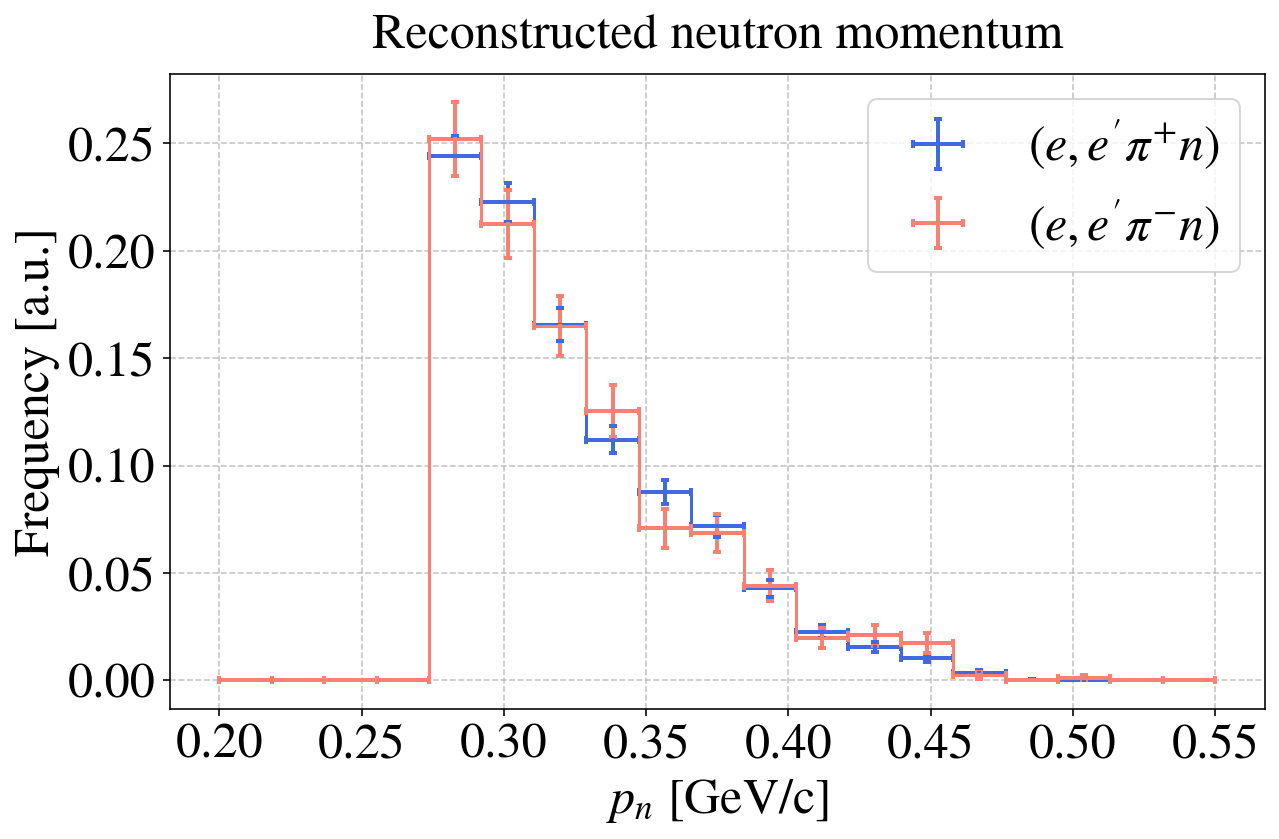

In [241]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.n_P, bins=np.linspace(0.2,0.55,20), marker='s',
                   markersize=1, color=pi_color,label="$(e,e'"+pi_label+"n)$", alpha=1, density=True)

set_axes(ax,'$p_n$ [GeV/c]',
         'Frequency [a.u.]', 
         title="Reconstructed neutron momentum",
         do_add_grid=True, do_add_legend=True,)
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(16,6),tight_layout=True)
ax = fig.add_subplot(1,2,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.n_Theta*r2d, bins=np.linspace(155,170,20), marker='s', markersize=1, color=pi_color,label='$'+pi_label+'$', alpha=1, density=True)

set_axes(ax,'$\\theta_n$ [deg.]',
         'Frequency [a.u.]', 
         title="neutron scattering angle",
         do_add_grid=True, do_add_legend=True,)

ax = fig.add_subplot(1,2,2)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.n_Phi*r2d, bins=np.linspace(-180,180,20), marker='s', markersize=1, color=pi_color,label='$'+pi_label+'$', alpha=1, density=True)

set_axes(ax,'$\phi_n$ [deg.]',
         '', 
         title="neutron azimuthal angle",
         do_add_grid=True, do_add_legend=True,)

## neutron transverse momentum to $q$

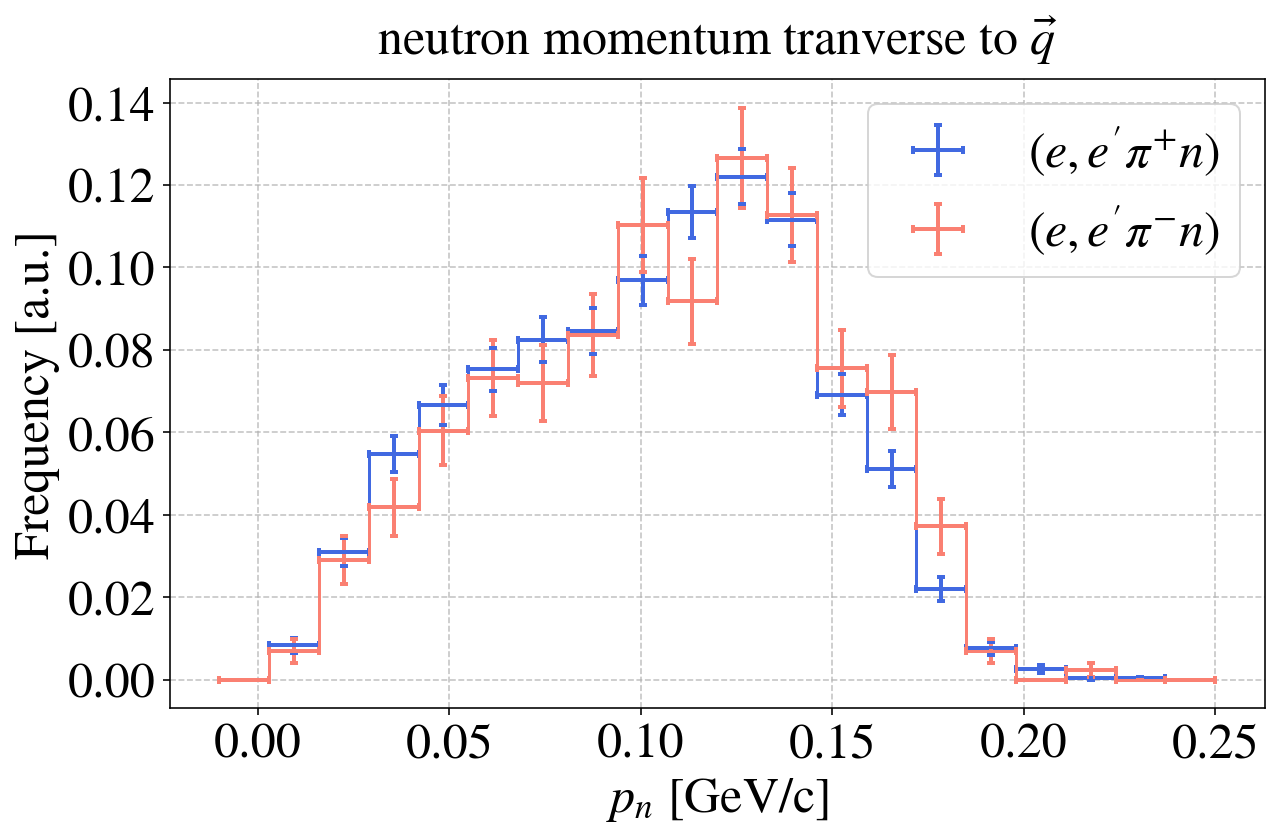

In [246]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.n_pT_qFrame, bins=np.linspace(-0.01,0.25,21), marker='s',
                   markersize=1, color=pi_color,label="$(e,e'"+pi_label+"n)$", alpha=1, density=True)

set_axes(ax,'$p_n$ [GeV/c]',
         'Frequency [a.u.]', 
         title="neutron momentum tranverse to $\\vec{q}$",
         do_add_grid=True, do_add_legend=True,)
plt.tight_layout()

## (4.2) $W$ vs. $W'$ for the tagged data (moving proton)

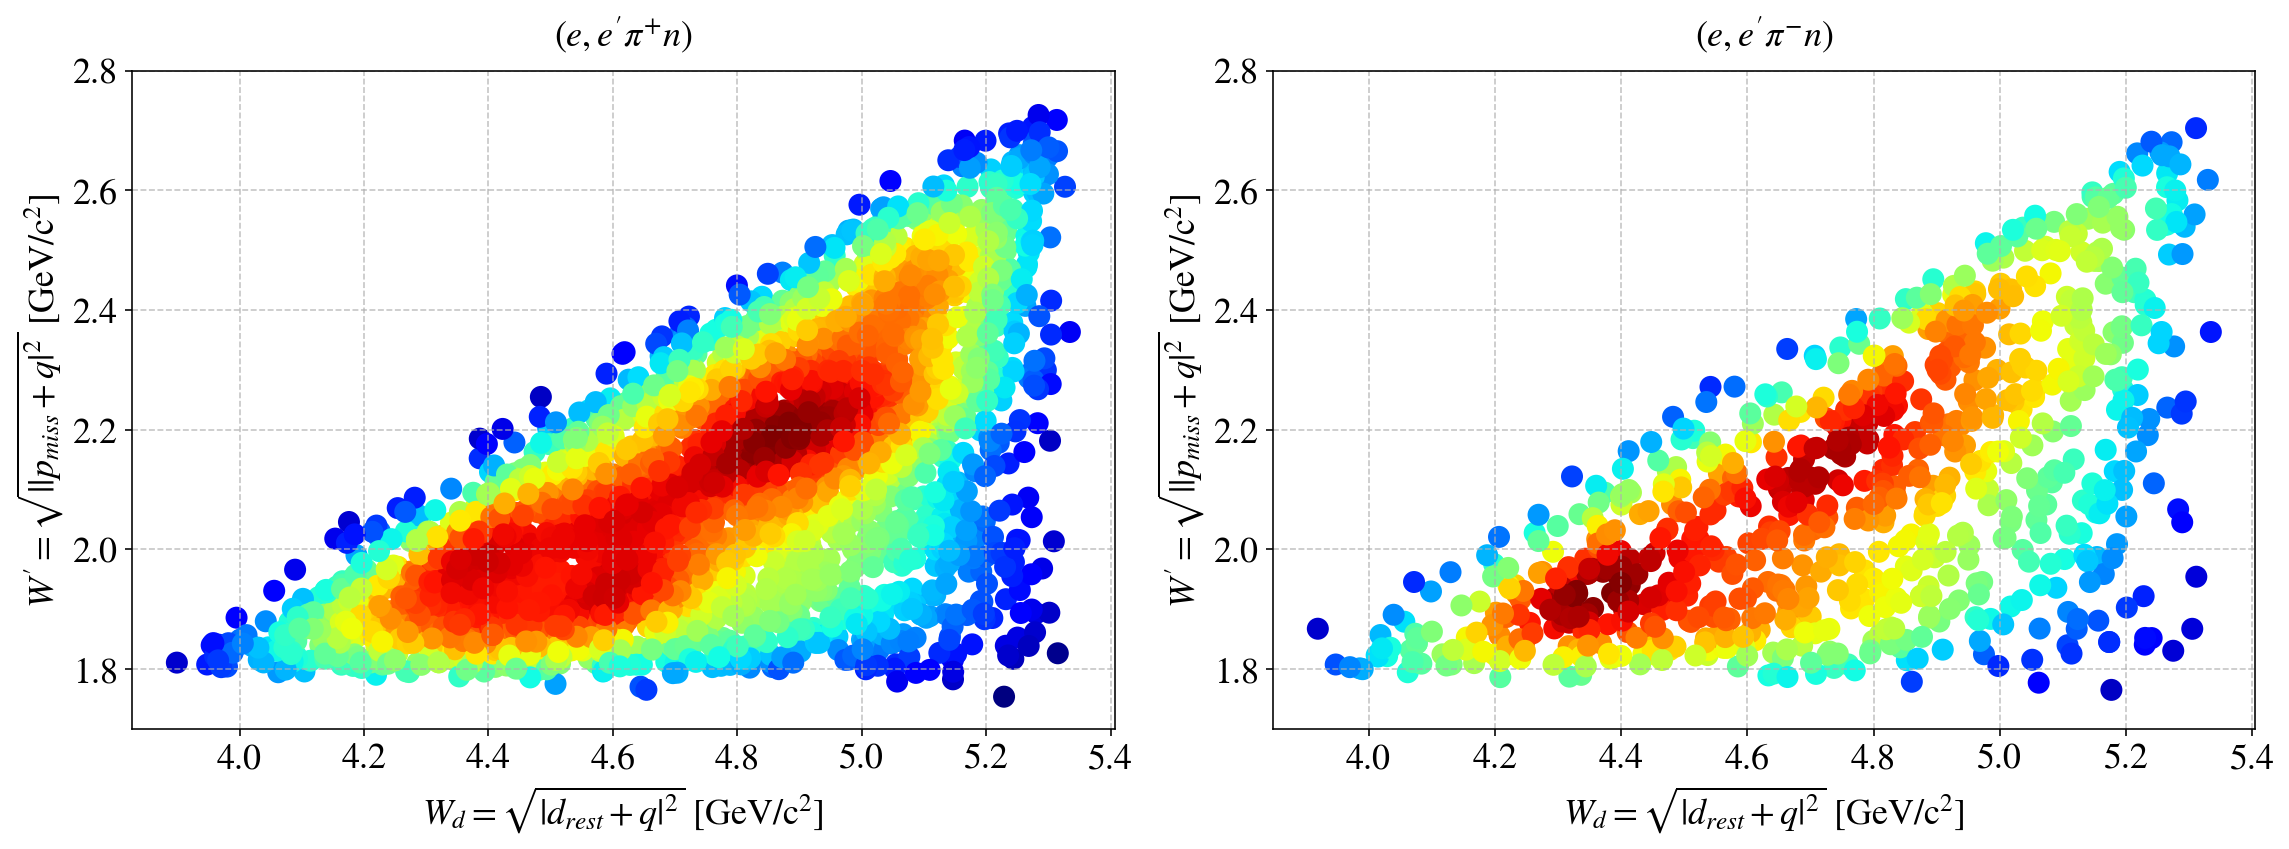

In [27]:
fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)

    df = e_e_pi_n_pass_cuts[pi_ch]
    scatter_plot_with_kernel(x=df.W_standing_d , y = df.WPrime, s=100,do_add_colorbar=False,cmap='jet')
    set_axes(ax,
             "$W_d = \sqrt{|d_{rest} + q|^2}$ [GeV/c$^2$]", 
             "$W' = \sqrt{||p_{miss} + q|^2}$ [GeV/c$^2$]",
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             ylim=(1.7,2.8))

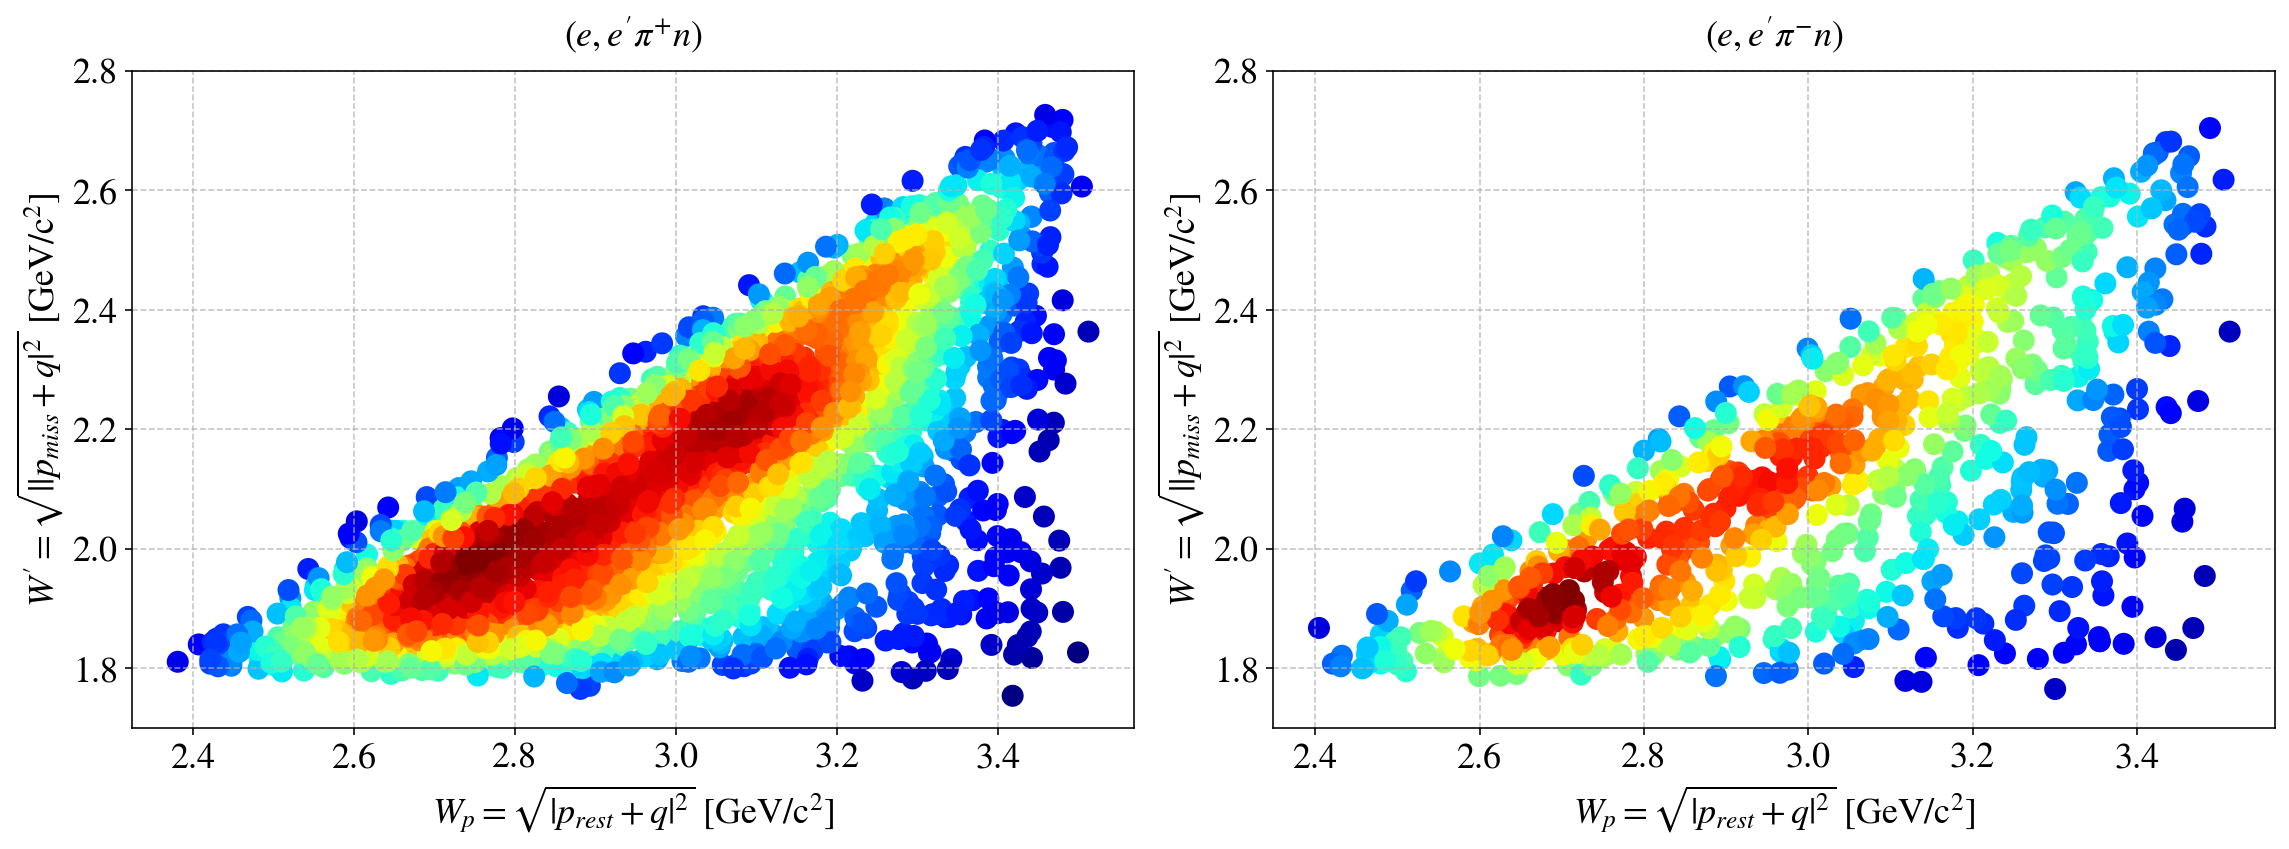

In [26]:
fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)

    df = e_e_pi_n_pass_cuts[pi_ch]
    scatter_plot_with_kernel(x=df.W_standing_p , y = df.WPrime, s=100,do_add_colorbar=False,cmap='jet')
    set_axes(ax,
             "$W_p = \sqrt{|p_{rest} + q|^2}$ [GeV/c$^2$]", 
             "$W' = \sqrt{||p_{miss} + q|^2}$ [GeV/c$^2$]",
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             ylim=(1.7,2.8))

## (4.3) neutron hit position in BAND

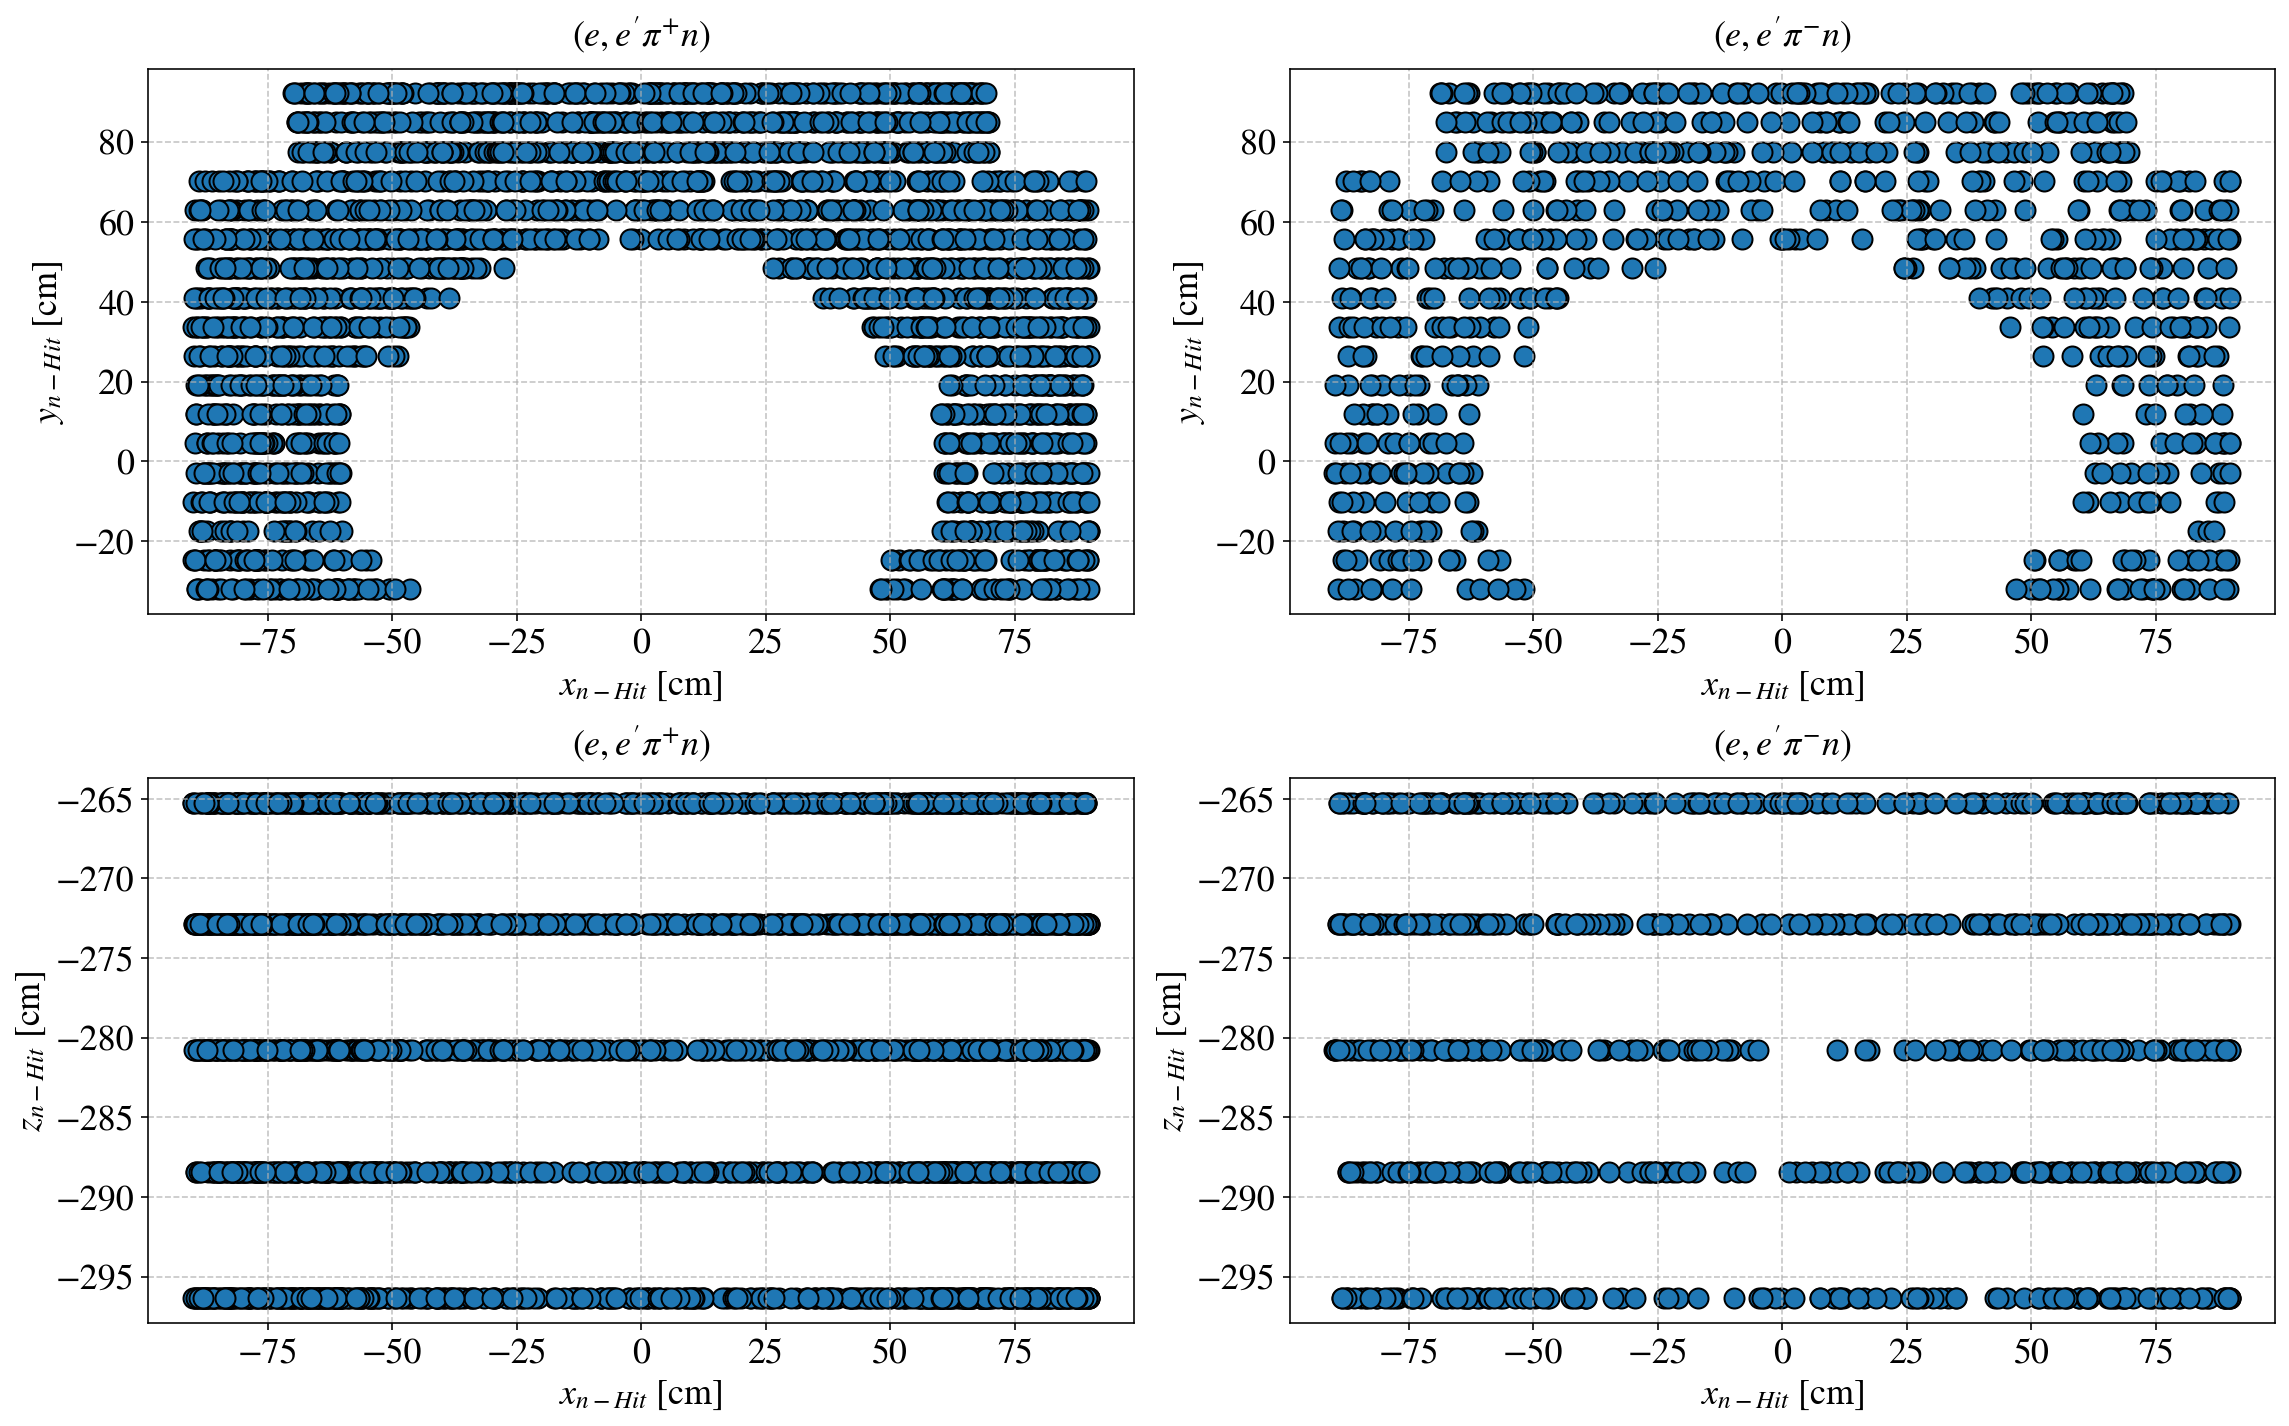

In [247]:
fig = plt.figure(figsize=(16,10),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(2,2,pi_idx)

    df = e_e_pi_n_pass_cuts[pi_ch]
    # scatter_plot_with_kernel(x=df.n_HitPos_X , y = df.n_HitPos_Y, s=100,do_add_colorbar=False,cmap='jet')
    plt.scatter(x=df.n_HitPos_X , y = df.n_HitPos_Y, s=100,cmap='jet', edgecolor='k')    
    set_axes(ax,
             "$x_{n-Hit}$ [cm]", 
             "$y_{n-Hit}$ [cm]", 
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18)    
    
    ax = fig.add_subplot(2,2,2+pi_idx)
    plt.scatter(x=df.n_HitPos_X , y = df.n_HitPos_Z, s=100,cmap='jet', edgecolor='k')        
    set_axes(ax,
             "$x_{n-Hit}$ [cm]", 
             "$z_{n-Hit}$ [cm]", 
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18)

### (4.3.1) 2D scatter plots with projections

In [333]:
import seaborn as sns
sns.set(font_scale=2,rc={'figure.facecolor':'white','axes.facecolor':'white','axes.edgecolor':'black'})

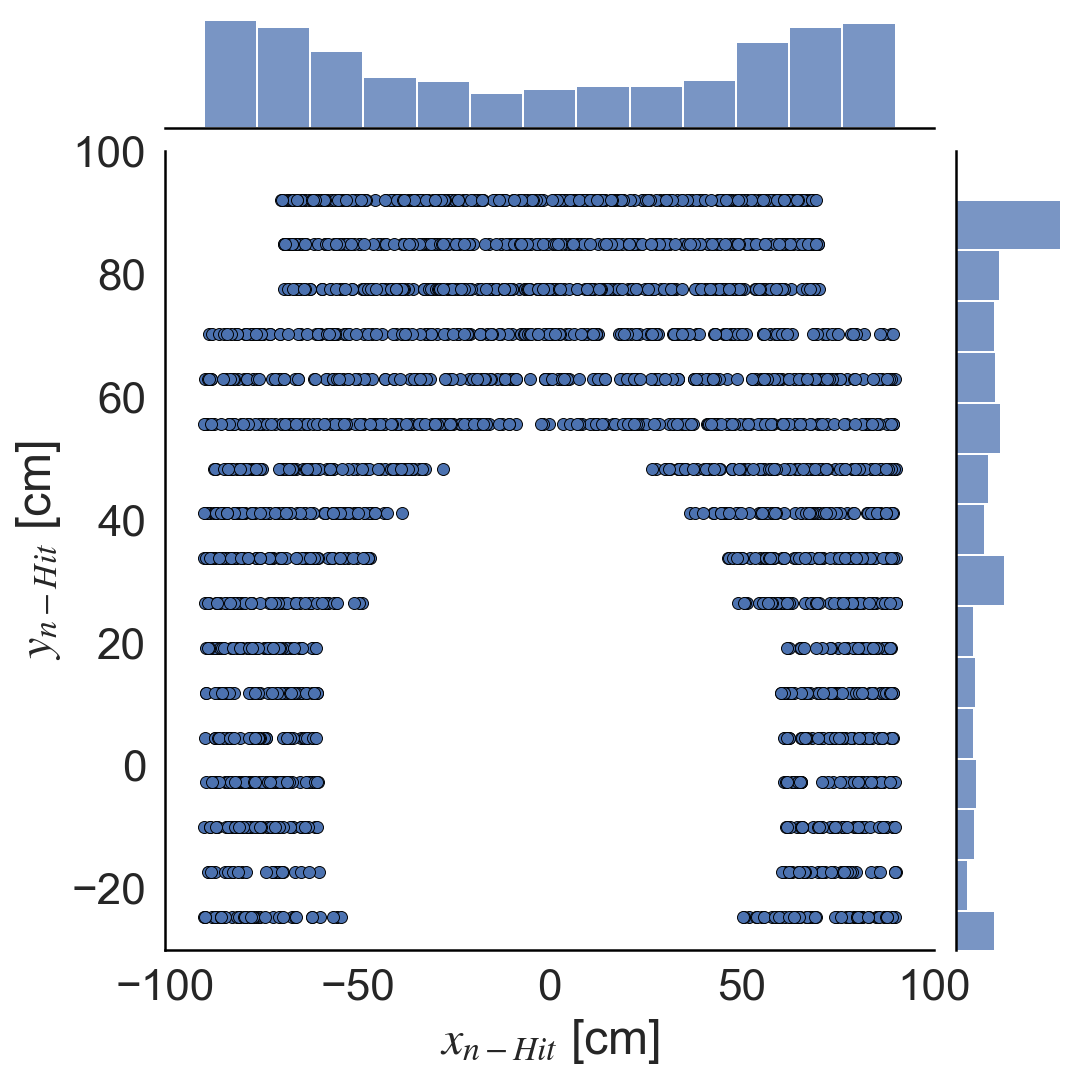

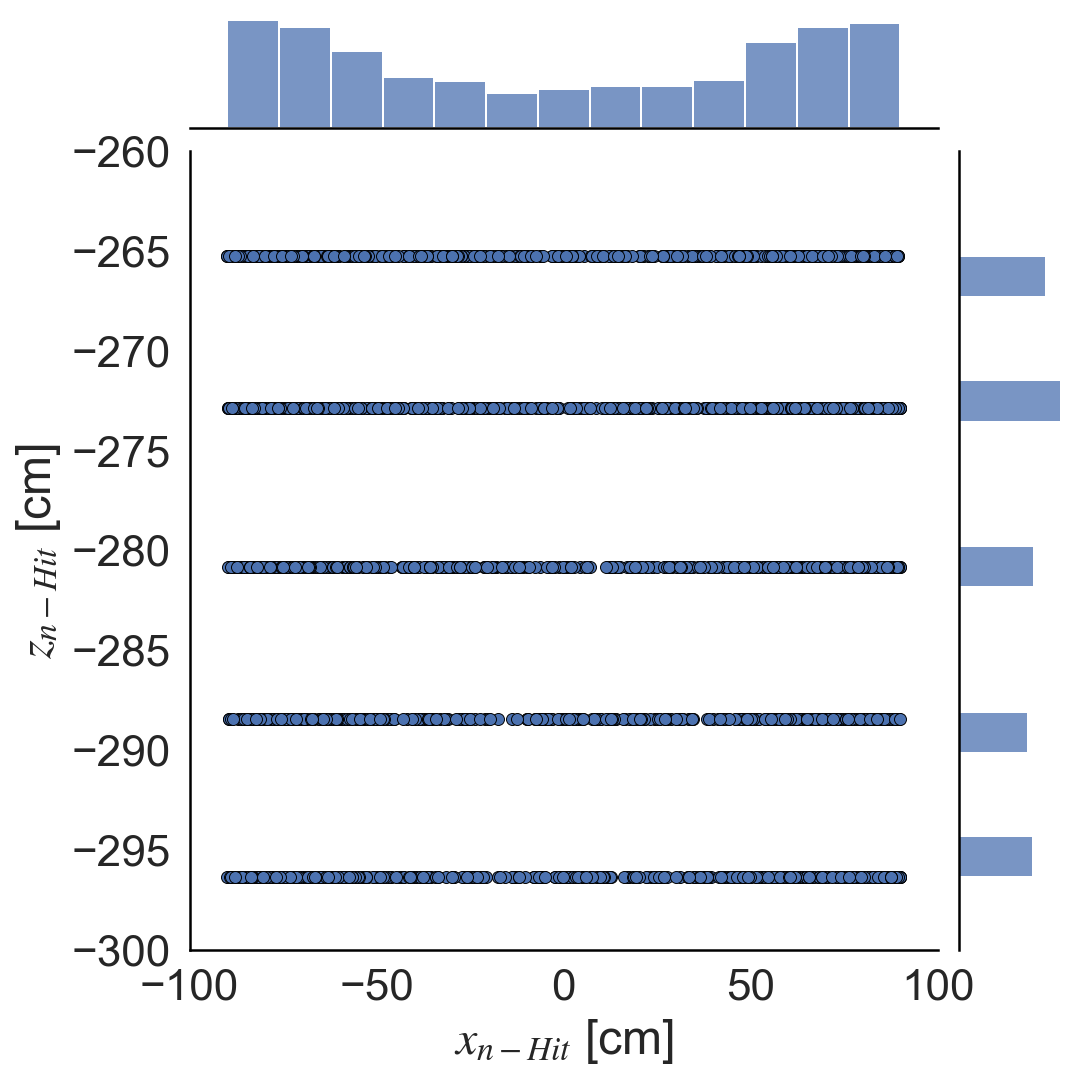

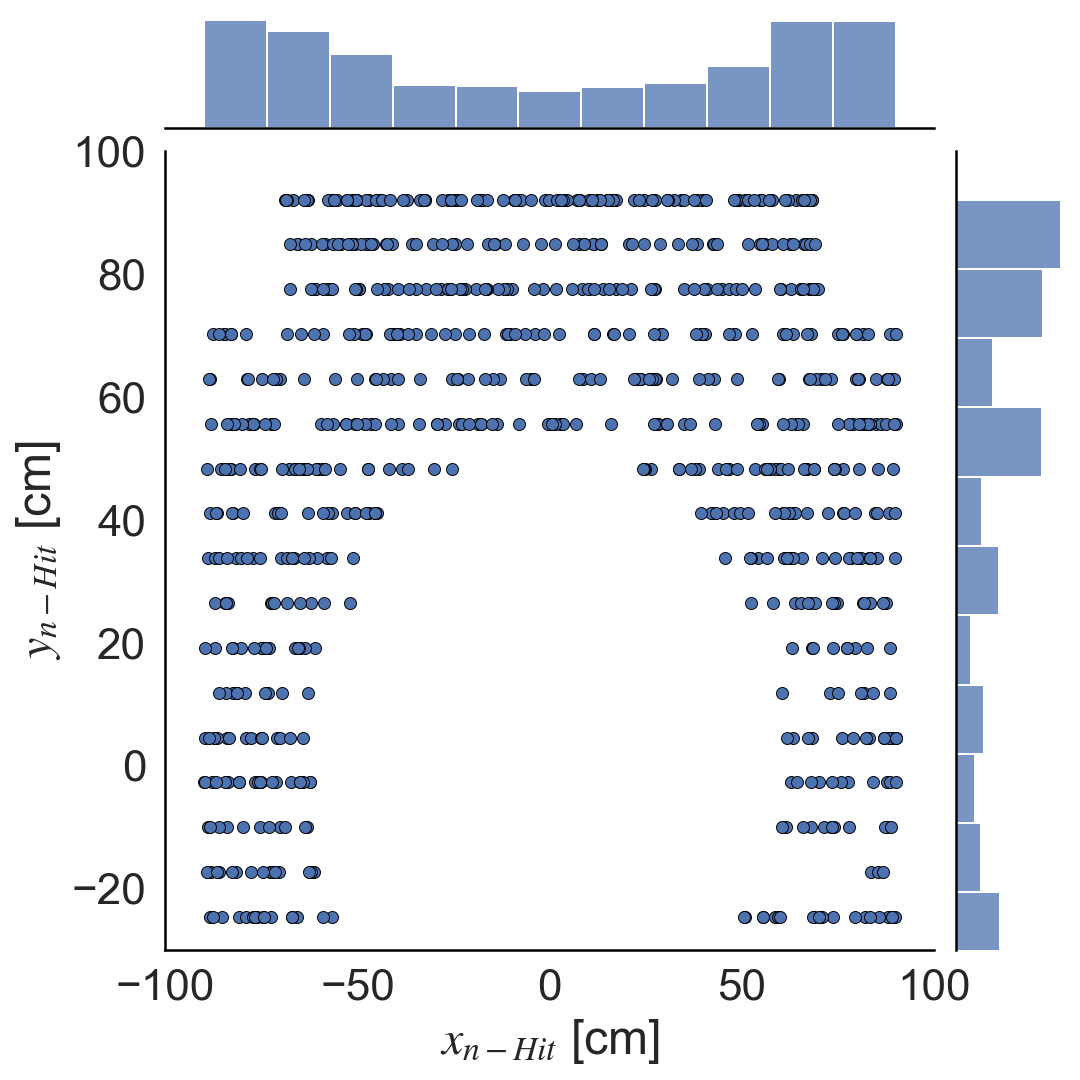

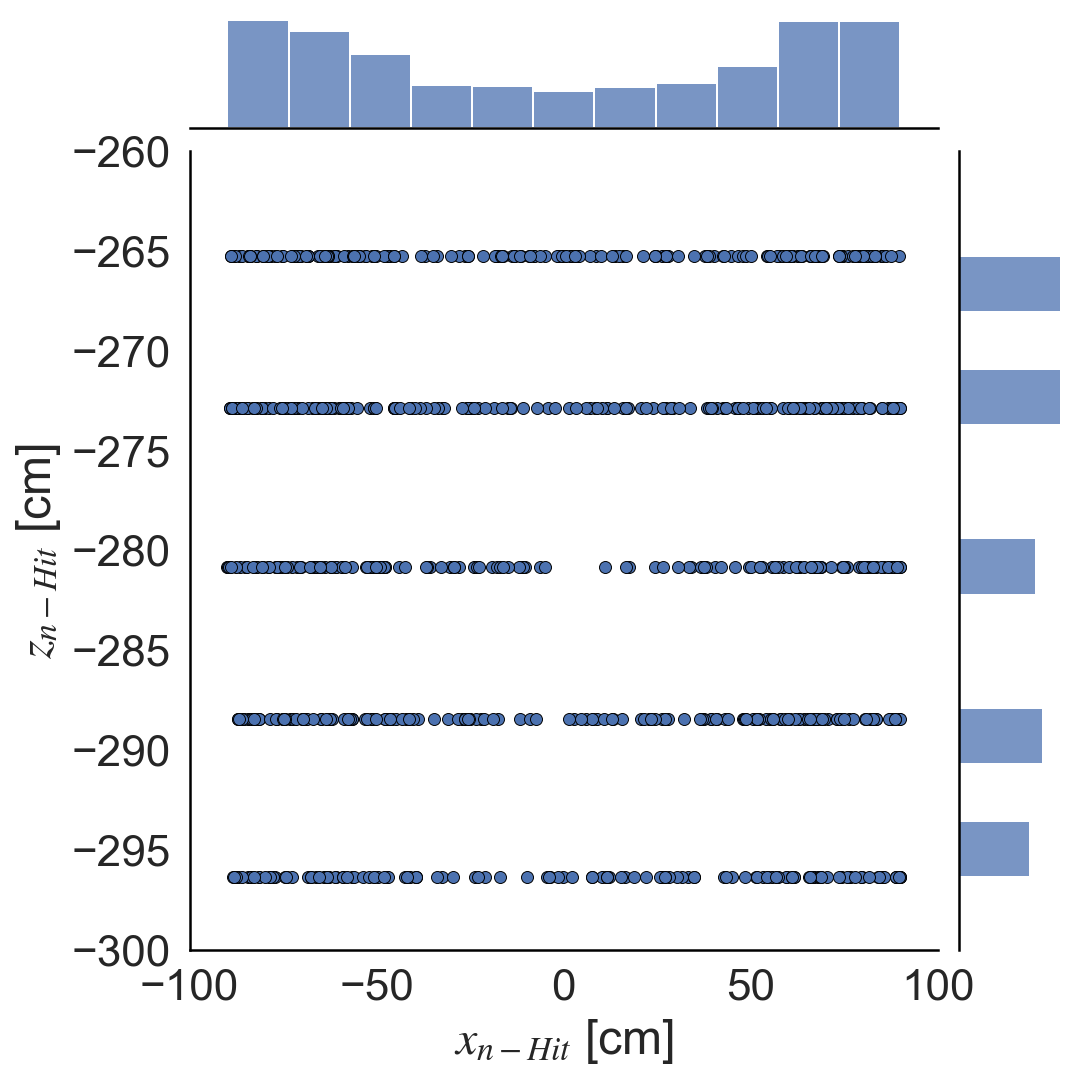

In [361]:
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    df = e_e_pi_n_pass_cuts[pi_ch]
    df.index=df.evnum*df.pi_P
    g = sns.jointplot(x="n_HitPos_X",  #sns.jointplot(x="n_HitPos_X", 
                  y="n_HitPos_Y",
                 edgecolor="black",
                      height=8,
                      ratio=6,
                 data=df, 
                  dropna=True,
                  # marginal_kws=dict(bins=np.linspace(-100,100,100)),
                  xlim=(-100,100),
                  ylim=(-30,100) );
    g.ax_joint.set_xlabel("$x_{n-Hit}$ [cm]")
    g.ax_joint.set_ylabel("$y_{n-Hit}$ [cm]")
    
    g = sns.jointplot(x="n_HitPos_X",  #sns.jointplot(x="n_HitPos_X", 
                  y="n_HitPos_Z",
                 edgecolor="black",
                      height=8,
                      ratio=6,
                 data=df, 
                  dropna=True,
                  # marginal_kws=dict(bins=np.linspace(-300,300,100)), 
                  xlim=(-100,100),
                  ylim=(-300,-260) );
    g.ax_joint.set_xlabel("$x_{n-Hit}$ [cm]")
    g.ax_joint.set_ylabel("$z_{n-Hit}$ [cm]")    


## (4.4) $\theta_n$ and $\phi_n$ distributions in bins of $x_B$ and $z$

### (4.4.1) angles in lab frame in bins of $x_B$ and $z$

In [ ]:
z_bins   = np.array([0.35,0.45,0.65])
z_widths = np.array([0.05,0.05,0.15])
x_bins   = np.array([0.2, 0.32, 0.44, 0.56 ])
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

In [ ]:
N_x = len(x)
N_z = len(z_bins)

In [ ]:
fig = plt.figure(figsize=(18,10),tight_layout=True)

for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{
    z_min,z_max = z_bin-z_width, z_bin+z_width

    for x_min,x_max,x_idx in zip(x_bins[:-1],x_bins[1:],range(N_x)):#{
        ax = fig.add_subplot( N_x,  N_z, z_idx + N_z*x_idx + 1 )
        for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

            df = e_e_pi_n_pass_cuts[pi_ch]
            # cut on xB and z
            df = df[  (z_min < df.Zpi) & (df.Zpi < z_max) 
                    & (x_min < df.xB ) & (df.xB  < x_max) ]
            
            plt.scatter( df.n_Theta*r2d, df.n_Phi*r2d, 
                        marker='o', s=50, color=pi_color,
                        label='$'+pi_label+'$', alpha=1, edgecolor='k')

        set_axes(ax,'$\\theta_n$ [deg.]' if x_idx > 1 else '',
                 '$\phi_n$ [deg.]' if z_idx==0 else '', 
                 title= "$%.1f < z < %.1f$"%(z_min,z_max) + ", " + "$%.2f < x_B < %.2f$"%(x_min,x_max) ,
                 xlim = (155, 170) ,xticks=(155,160,165,170),
                 remove_ticks_x = False if x_idx > 1 else  True,
                 ylim = (-180, 180),yticks=(-180,-60,60,180),
                 remove_ticks_y = False if z_idx%N_z==0 else  True,
                 do_add_grid=True, 
                 do_add_legend=False if z_idx==0 and x_idx==1 else False)
    #}    
#}

### (4.4.2) angles in $q$-Frame

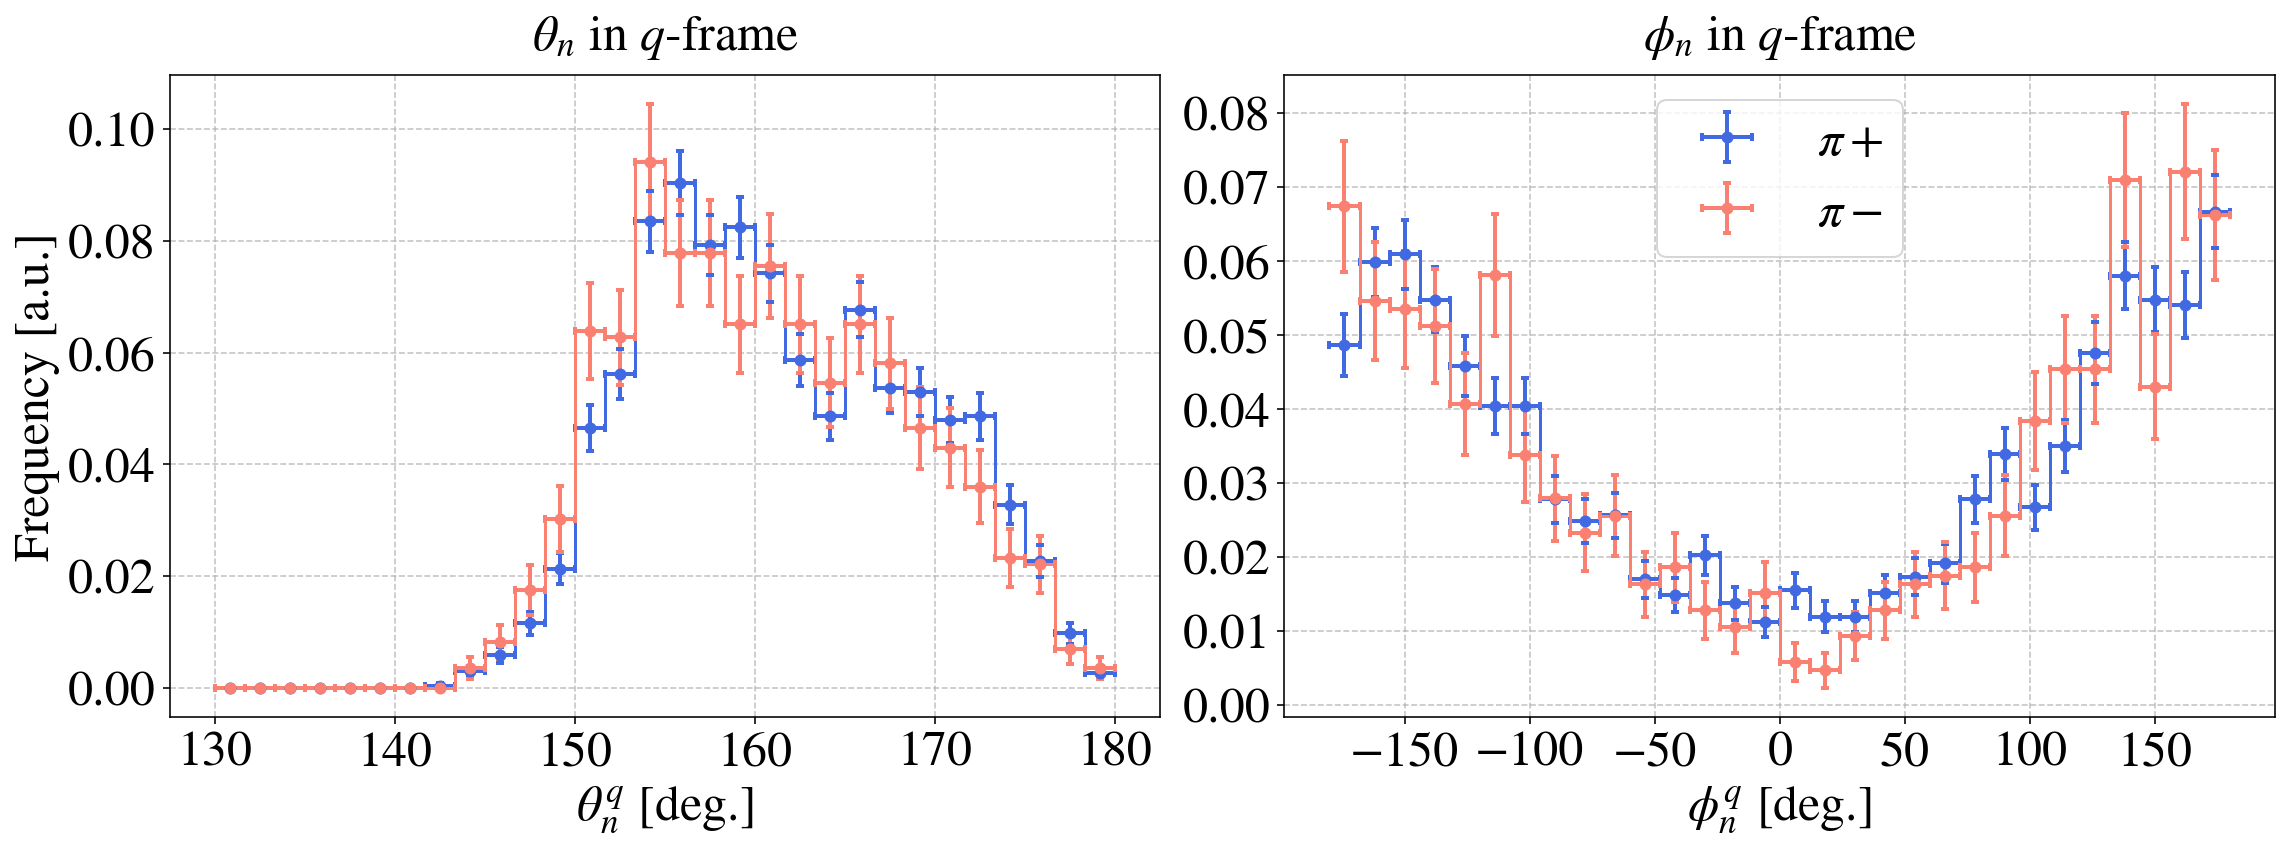

In [238]:
Nbins = 31
fig = plt.figure(figsize=(16,6),tight_layout=True)
for var,varlabel,vartitle,var_bins,var_idx in zip(['n_Theta_qFrame','n_Phi_qFrame'],
                                                  ['$\\theta_n^q$ [deg.]','$\phi_n^q$ [deg.]'],
                                                  ['$\\theta_n$ in $q$-frame','$\phi_n$ in $q$-frame'],
                                                  [np.linspace(130,180,Nbins),np.linspace(-180,180,Nbins)],
                                                  [1,2]):

    ax = fig.add_subplot(1,2,var_idx)
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

        df = e_e_pi_n_pass_cuts[pi_ch]
        plot_step_hist( df[var]*r2d, bins=var_bins, color=pi_color, label='$'+pi_print+'$', density=True)

    set_axes(ax,varlabel,
                 'Frequency [a.u.]' if var_idx==1 else '', 
                 title= vartitle,
                 # xlim = (155, 170) ,xticks=(155,160,165,170),
                 # ylim = (-180, 180),yticks=(-180,-60,60,180),
                 # remove_ticks_y = False if z_idx%N_z==0 else  True,
                 do_add_grid=True, 
                 do_add_legend=False if var_idx==1 else True)
    #}    
#}

# (5) Plot $M_X$ distribution (without the cut on it) vs. W
Untagged: $M_X^{standing \; d}$ vs. $W$

Tagged: $M_X^{moving \; p}$ vs. $W'$

In [ ]:
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_Mx_cut=False, 
                                                                             fdebug=2, 
                                                                             NeventsMax=-1);

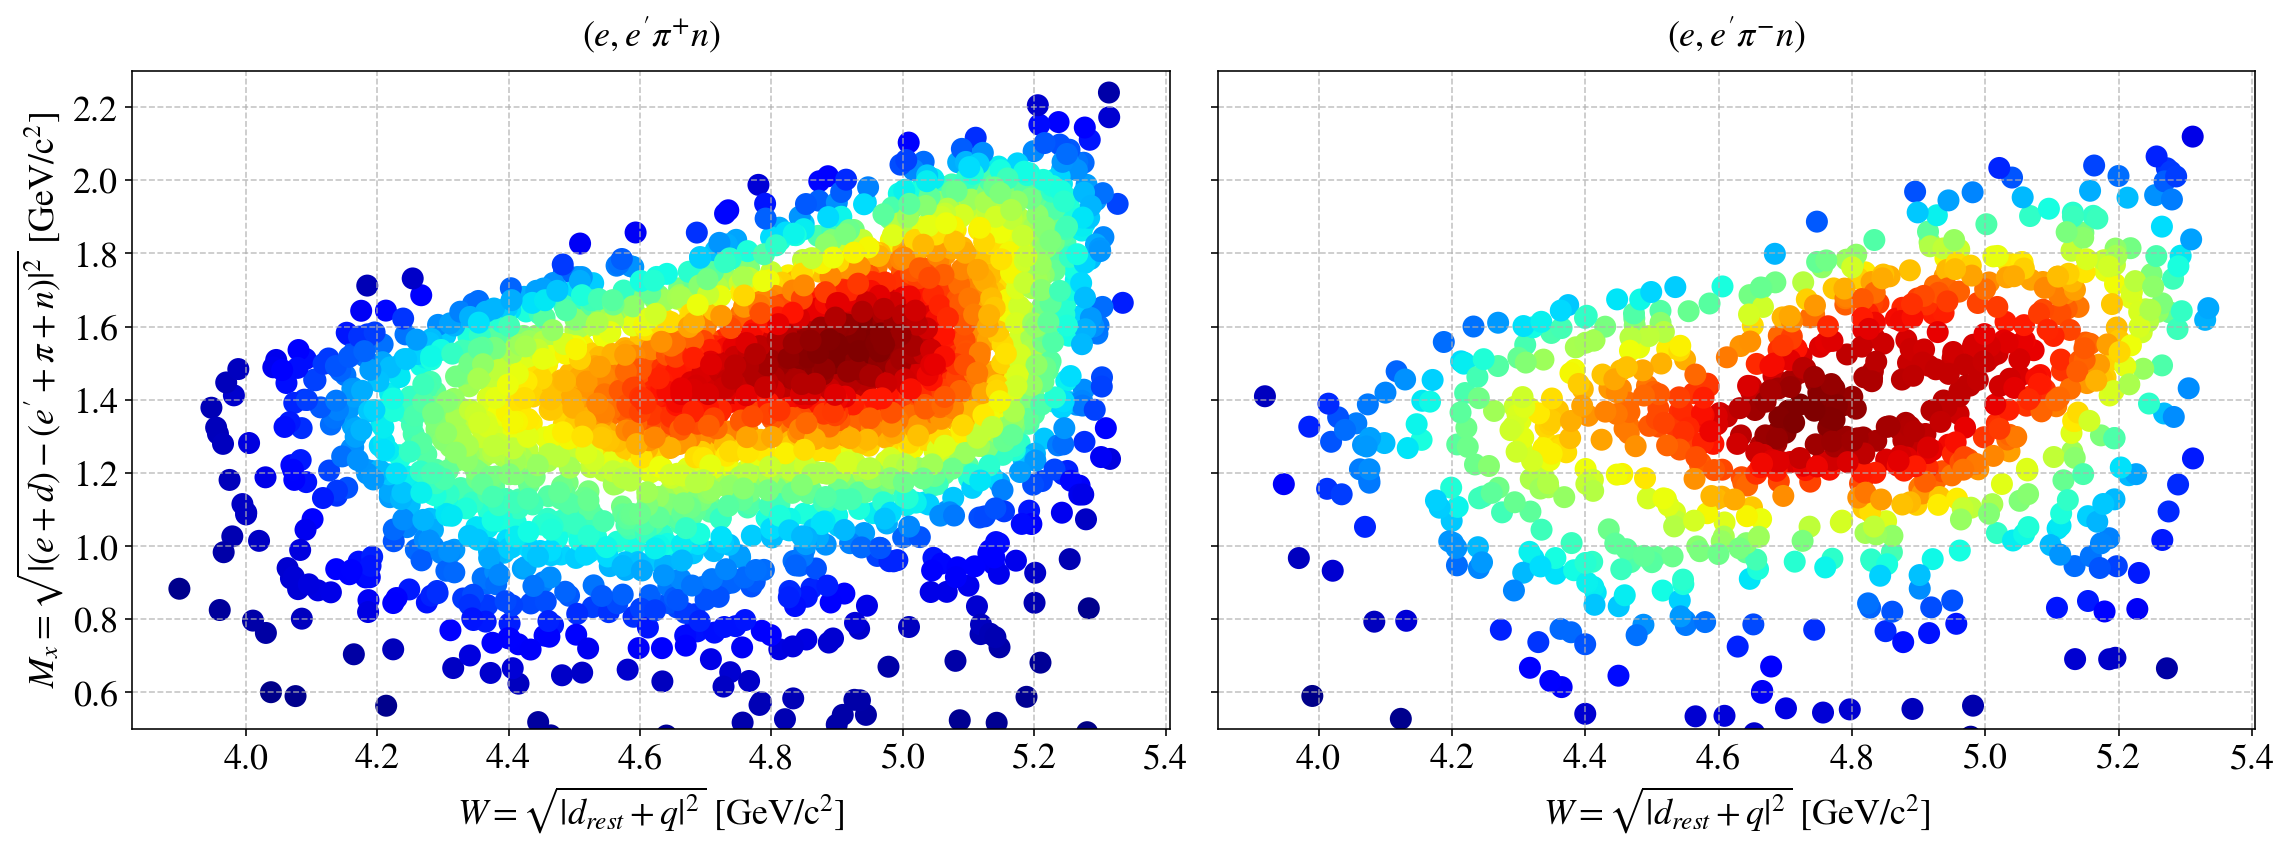

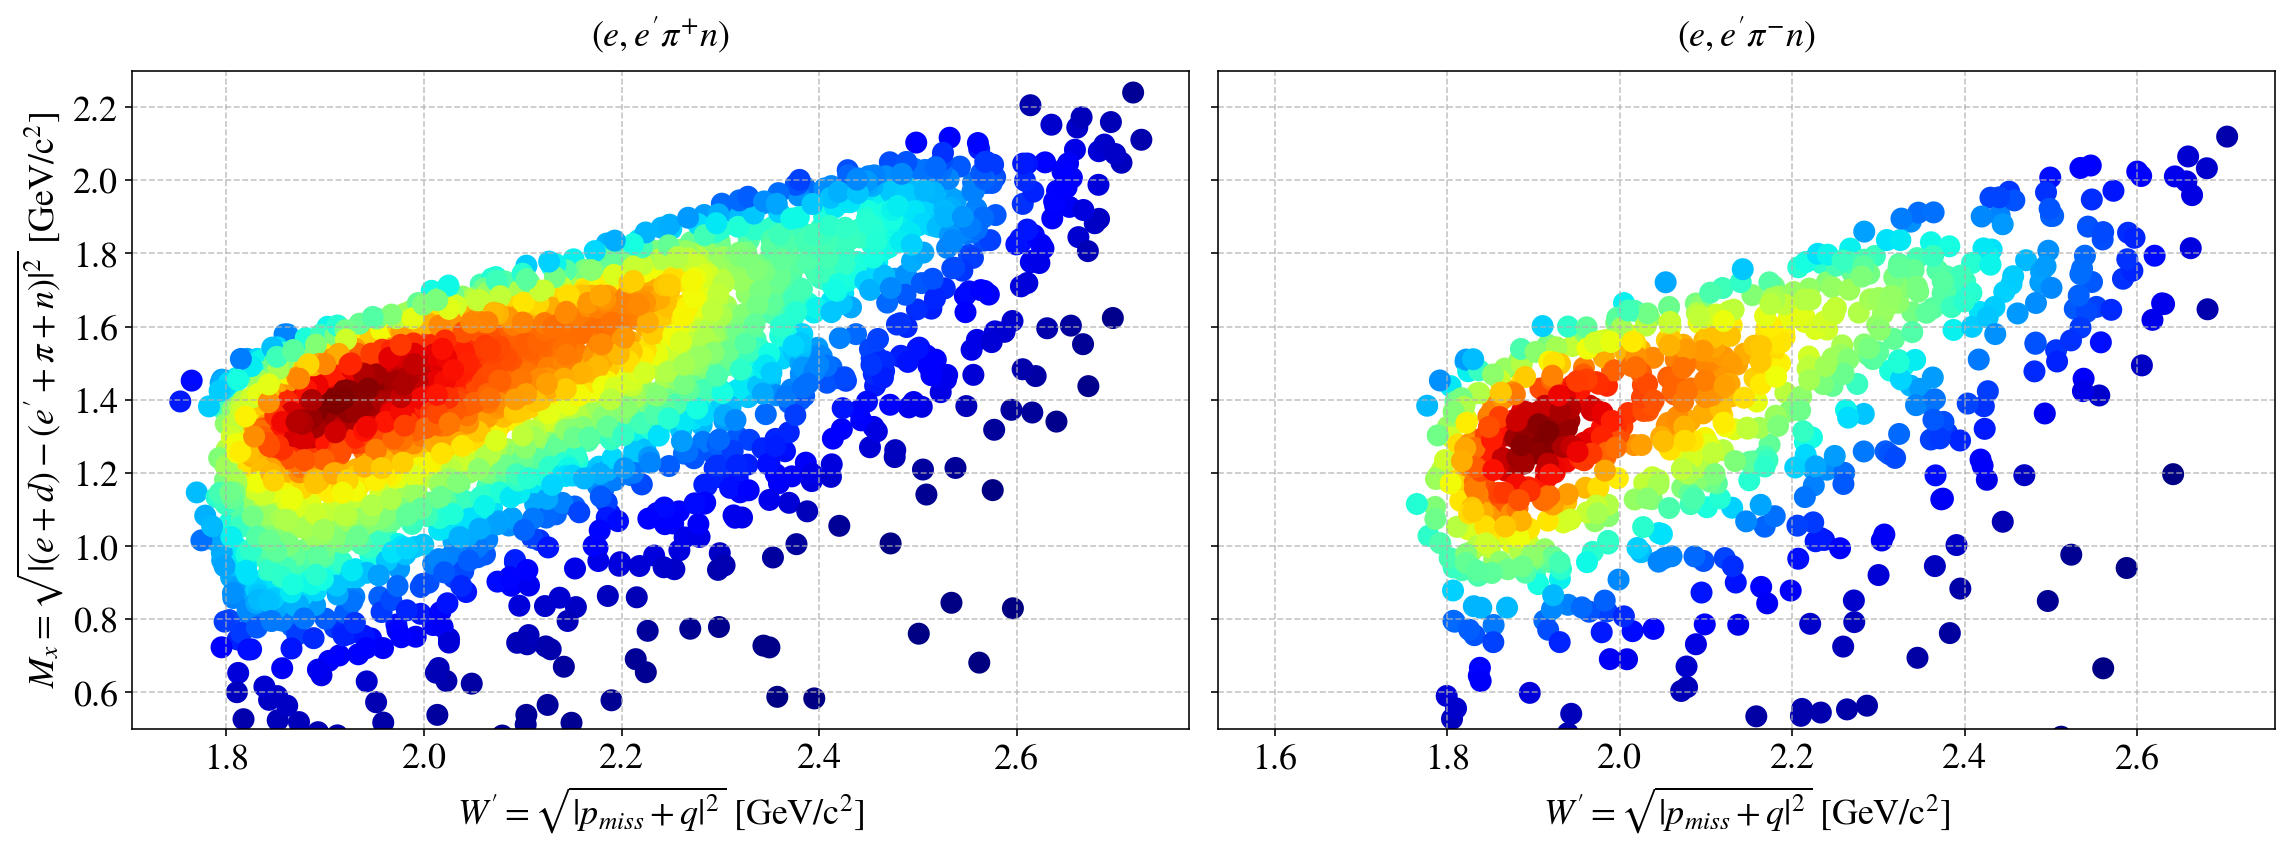

In [31]:
# Mx_label = "$M_x = \sqrt{|(p_{beam}+p_{target})-(p_{e'}+p_{\pi}+p_{n})|^2}$ [GeV/c$^2$]"
Mx_label = "$M_x = \sqrt{|(e+d)-(e'+\pi+n)|^2}$ [GeV/c$^2$]"
ylim=(0.5,2.3)


fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    df = e_e_pi_n_pass_cuts[pi_ch]

    ax = fig.add_subplot(1,2,pi_idx)
    scatter_plot_with_kernel(x=df.W_standing_d , y = df.M_X_ee_pi_n, s=100,do_add_colorbar=False,cmap='jet')
    set_axes(ax,
             "$W = \sqrt{|d_{rest} + q|^2}$ [GeV/c$^2$]", 
             Mx_label if pi_idx==1 else '',
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             remove_ticks_y=True if pi_idx==2 else False,
             ylim=ylim)
    
    
fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    df = e_e_pi_n_pass_cuts[pi_ch]

    ax = fig.add_subplot(1,2,pi_idx)
    scatter_plot_with_kernel(x=df.WPrime , y = df.M_X_ee_pi_n, s=100,do_add_colorbar=False,cmap='jet')
    set_axes(ax,
             "$W' = \sqrt{|p_{miss} + q|^2}$ [GeV/c$^2$]",
             Mx_label if pi_idx==1 else '',
             title="$(e,e'"+pi_label+" n)$",
             do_add_grid=True, do_add_legend=False,fontsize=18,
             remove_ticks_y=True if pi_idx==2 else False,
             ylim=ylim)    

# arxiv

## Correction for $W$

In [ ]:
wrong_W = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/skimmed_SIDIS_sidisdvcs_006421_e_piplus_selected_eepi_kinematics.csv')
corrected_W = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/skimmed_SIDIS_sidisdvcs_006421_e_piplus_selected_eepi_kinematics_corrected_W.csv')

In [ ]:
fig,ax = plt.subplots(figsize=(9,6))
for df, label,color in zip([wrong_W,corrected_W],['wrong W','corrected W'],['k','b']):
    plot_step_hist( df.W, bins=np.linspace(2,6,100),color=color, label=label, density=True)
    
set_axes(ax,'$W$','counts',do_add_grid=True,do_add_legend=True);    

In [ ]:
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=False, 
                                                                             fdebug=2, 
                                                                             NeventsMax=-1);

## (3.2) now choose binning and plot $p_n$ distribution in each bin 

In [ ]:
x_bins   = np.linspace(0.2,0.5,6)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
Nbins    = len(x_bins)
x_bins

In [ ]:
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"

In [ ]:
fig = plt.figure(figsize=(12,8))
pi_ch = 'piplus'
for bin_idx in range(Nbins):
    x_min, x_max  = x_bins[bin_idx] - x_err[1], x_bins[bin_idx] + x_err[1]
    # df = e_e_pi_pass_cuts[pi_ch];
    # eepi_in_bin   = df[ (x_min < df.xB ) & (df.xB < x_max )]

    df = e_e_pi_n_pass_cuts[pi_ch];
    eepi_n_in_bin = df[ (x_min < df.xB ) & (df.xB < x_max )]

    ax  = fig.add_subplot(2,Nbins/2,bin_idx+1)
    ax.hist( eepi_n_in_bin.n_P, bins=np.linspace(0.2,0.6,20) )
    set_axes(ax,'$p_n$ [GeV]','counts', title='$%.2f < x_B < %.2f$'%(x_min,x_max), xlim=(0.2,0.6),fontsize=16);

plt.tight_layout()

# Add two lines indicating the cut boundaries
# estimate background from distribution outside the cut region

## Other kinematical variables like $Q^2$ and $W$

In [ ]:
np.min(df.xB)

In [ ]:
var  = 'W'
bins = np.linspace(1.5,4,21)
varlabel = '$W^2$'
varunits = '[GeV/c$^2$]'

fig = plt.figure(figsize=(14,6))

for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    
    df = e_e_pi_pass_cuts[pi_ch]
    x,h,_,_ = plot_step_hist( df[var], bins=bins, marker='o', 
                             linewidth=0.5, color=pi_color,label=None, alpha=1, density=True)
    ax.step(x,h,'-k',where='mid',label='untagged', )

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df[var], bins=bins, marker='s', markersize=10, color=pi_color,label='tagged', alpha=1, density=True)

    set_axes(ax,varlabel+varunits,'Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True)
plt.tight_layout()

###

In [ ]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/'
results_data_path = main_data_path + '/' + 'Results' + '/'
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims[z_bin]
    y_err_up = Rpips2pims_errup[z_bin]
    y_err_dw = Rpips2pims_errdw[z_bin]
    df_to_save = pd.DataFrame({"$x_B$":x,"$\Delta x_B$":x_err,
                               '$R$':y,
                               '$\Delta R_{+}$':y_err_up,'$\Delta R_{-}$':y_err_dw})
    print('$z=%.2f\pm%.2f$'%(z_bin,z_width))
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)
    filename  =  results_data_path + 'Untagged_SIDIS_ratio_' + filelabel + '.csv'
    print(filename)
    
    display(df_to_save)
    # df_to_save.to_csv(filename)
    # print('saved',filename)